<center><font size=6.5> Project: Advance Machine Learning-EasyVisa</font></center>


# Problem Statement

## Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying
and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look
for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or
permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US
employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs
are administered by the Office of Foreign Labor Certification (OFLC).
OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants
certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at
wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications.
This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every
case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates
having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa
have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that
significantly influence the case status.

## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

1. **case_id**: ID of each visa application  
2. **continent**: Information of continent the employee  
3. **education_of_employee**: Information of education of the employee  
4. **has_job_experience**: Does the employee have any job experience? Y = Yes; N = No  
5. **requires_job_training**: Does the employee require any job training? Y = Yes; N = No  
6. **no_of_employees**: Number of employees in the employer's company  
7. **yr_of_estab**: Year in which the employer's company was established  
8. **region_of_employment**: Information of foreign worker's intended region of employment in the US  
9. **prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment  
10. **unit_of_wage**: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly  
11. **full_time_position**: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position  
12. **case_status**: Flag indicating if the Visa was certified or denied  


# **Importing the necessary libraries**

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn: Preprocessing & Model selection
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scikit-learn: Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier
)

# Scikit-learn: Metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    f1_score, recall_score, precision_score, accuracy_score,confusion_matrix,
)

from sklearn import metrics
# Install and import external libraries
!pip install xgboost
!pip install imblearn --user

# For randomness
RS = 42  # Random seed for reproducibility

# Imbalanced-learn: Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# **Loading the data**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# loading data into a pandas dataframe
EasyVisa = pd.read_csv("EasyVisa.csv")

In [4]:
# creating a copy of the data
data=EasyVisa.copy()

# **Data Overview**

## Viewing the first and last 5 rows

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Shape,Info and satistical analysis over data

In [7]:
data.shape

(25480, 12)

*   There are 25480 rows and 12 columns in these data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- No missing values in any column

- Data types are appropriate:

- int64: 2 columns (e.g., number of employees, year of establishment)

- float64: 1 column (prevailing wage)

- object: 9 columns (categorical/text data like continent, case status, etc.)



In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- The average number of employees in companies applying for visas is approximately 5,667, but the maximum is very high (602,069), indicating possible large enterprises.

- The minimum number of employees is -26, which is invalid (cannot have negative employees). This needs data correction or removal.

- The minimum prevailing wage is $2.13, which is unrealistically low, especially for positions requiring visas. This might be due to:

- Incorrect wage units (e.g., hourly wage being mistaken for yearly).

- Data entry errors.
It should be validated or cleaned before model training.

- The average prevailing wage is around $74,456, which seems reasonable for skilled positions.

- The year of establishment ranges from 1800 to 2016. A year like 1800 is highly suspicious, since no company is likely that old — it should be verified or filtered.

In [10]:
data['case_status'].value_counts(normalize=True)*100

,proportion
case_status,
Certified,66.789639
Denied,33.210361


# **Exploratory Data Analysis**

## **Univariate Analysis**

In [11]:
categorical_columns=data.select_dtypes(include=['object','category']).columns.to_list()
numerical_columns=data.select_dtypes(include=['number','float']).columns.to_list()

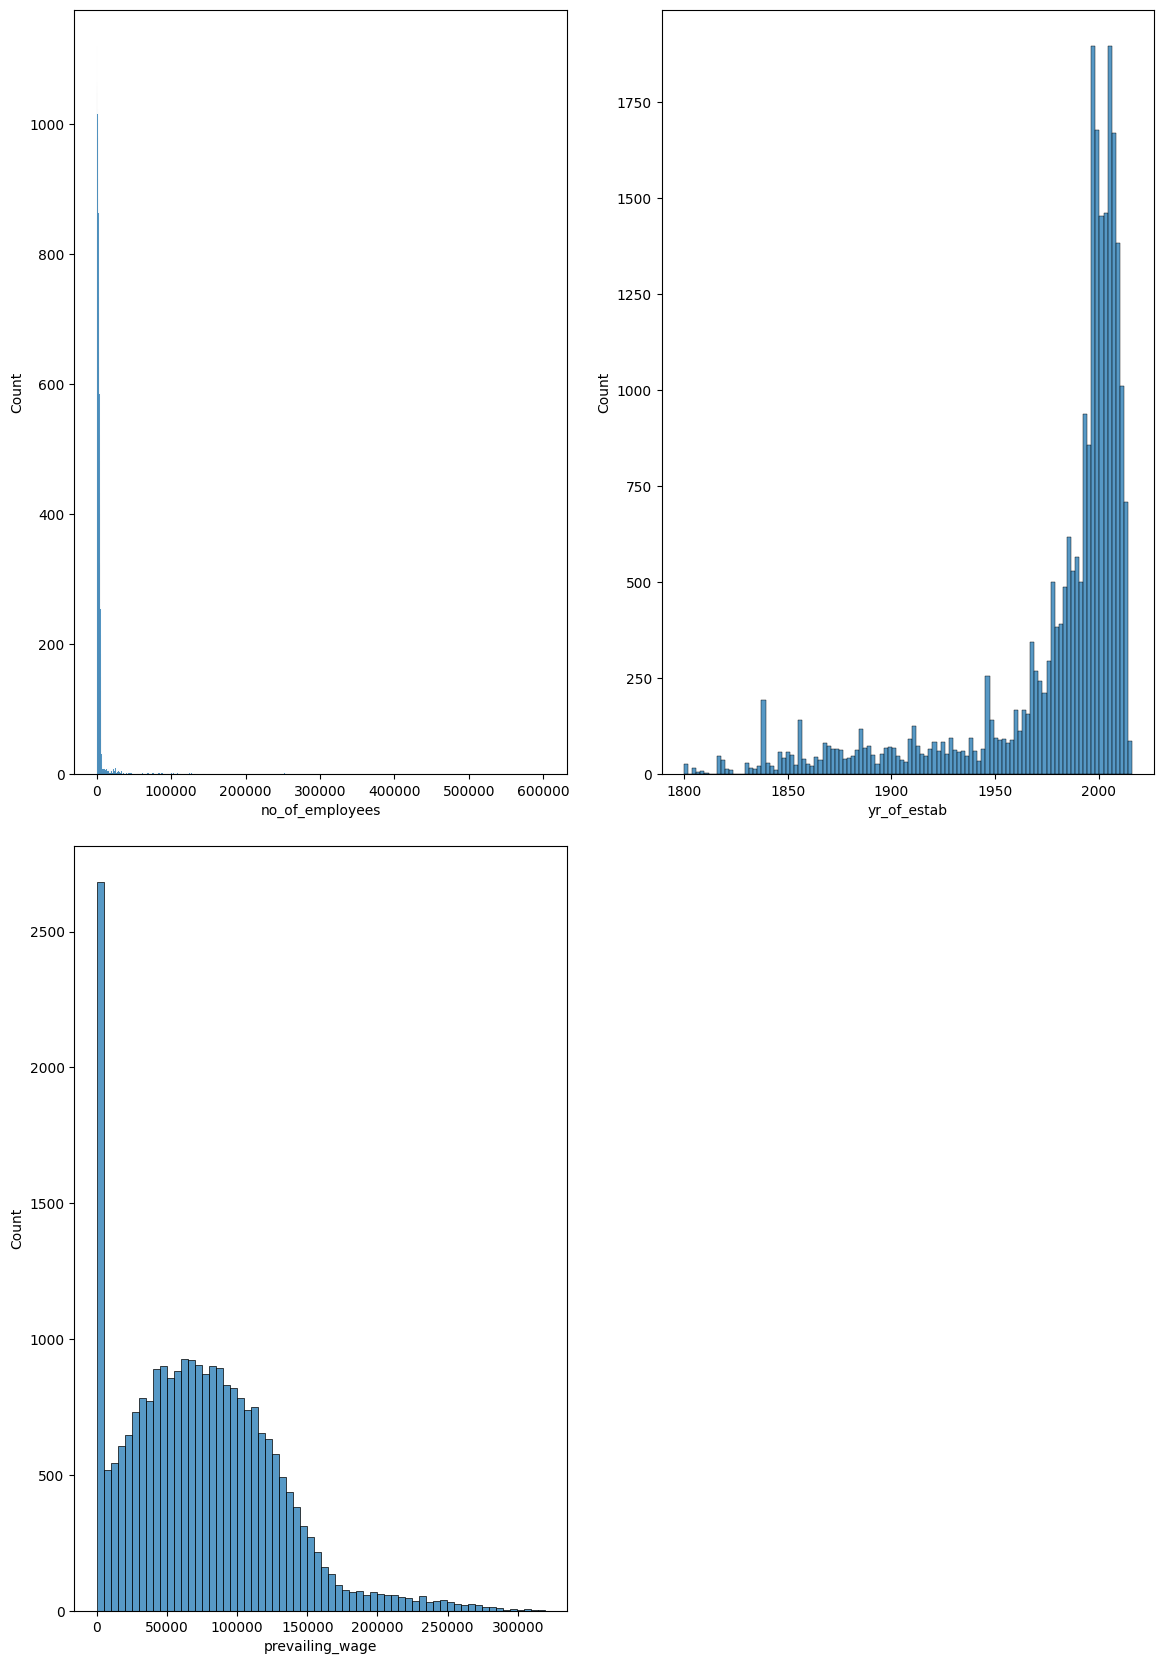

In [12]:
plt.figure(figsize=(12,17))
for i,feature in enumerate(numerical_columns):
  plt.subplot(2,2,i+1)
  sns.histplot(data=data,x=feature,palette='viridis',)
  plt.tight_layout(pad=2)
plt.show()

- From the distribution plots, we observe that both no_of_employees and prevailing_wage are heavily right-skewed, while yr_of_estab is left-skewed, indicating that most companies are newer and tend to have fewer employees and moderate wages

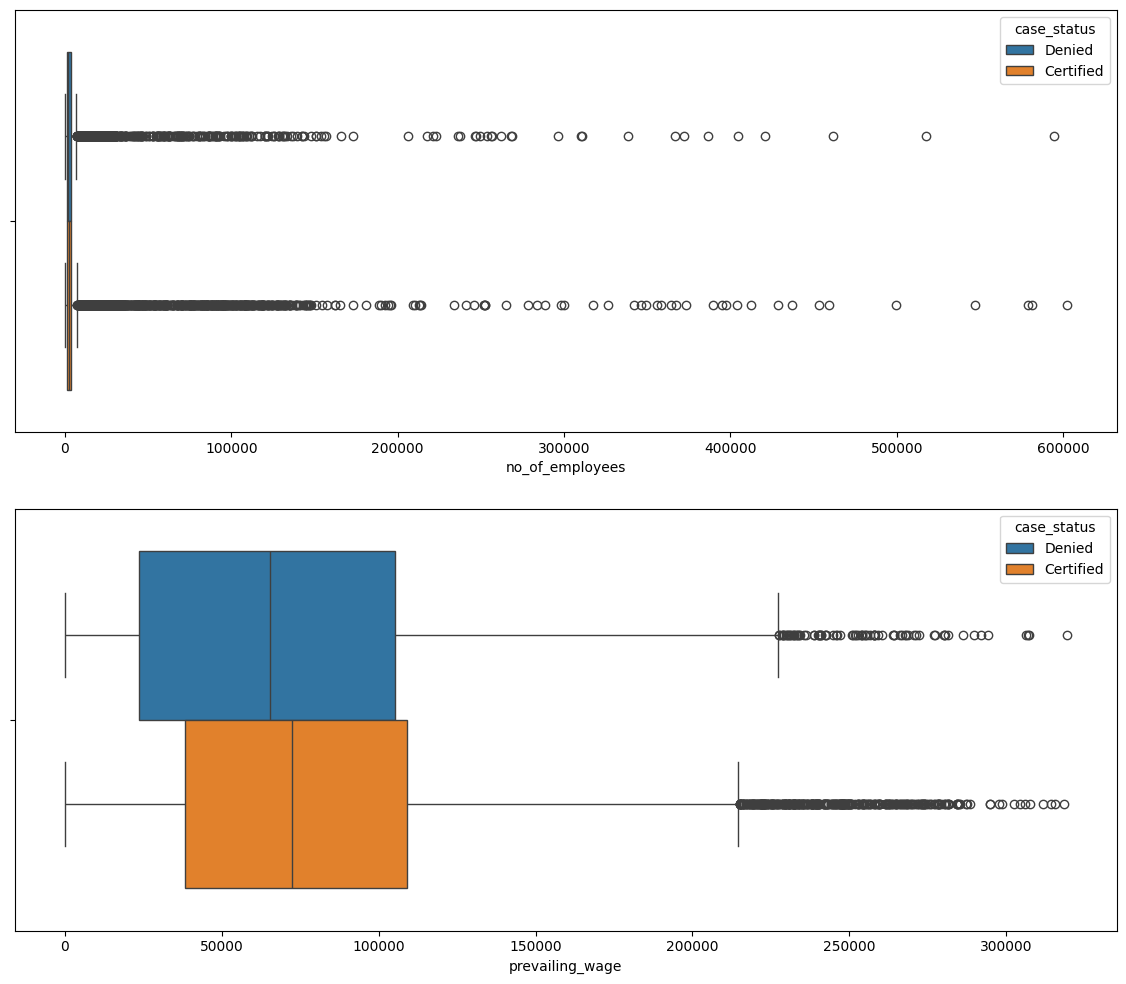

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.boxplot(x='no_of_employees', data=data, ax=ax[0],hue='case_status')  # seaborn boxplot
plt.tight_layout(pad=2)
# or using pandas plot:
# data.boxplot(column='no_of_employees', ax=ax[0]).

sns.boxplot(data=data,x='prevailing_wage',ax=ax[1],hue='case_status')

plt.show()

- Years are not suitable for statistical calculations like box plots, so I am omitting them to avoid misleading interpretations.

- no_of_employees and prevailing_wage are heavily right-skewed, showing many extreme outliers.

- The skewness appears regardless of case_status (Certified or Denied).

- Most companies have relatively few employees, but a few have extremely high numbers.

- Wages vary a lot, with most being on the lower end.

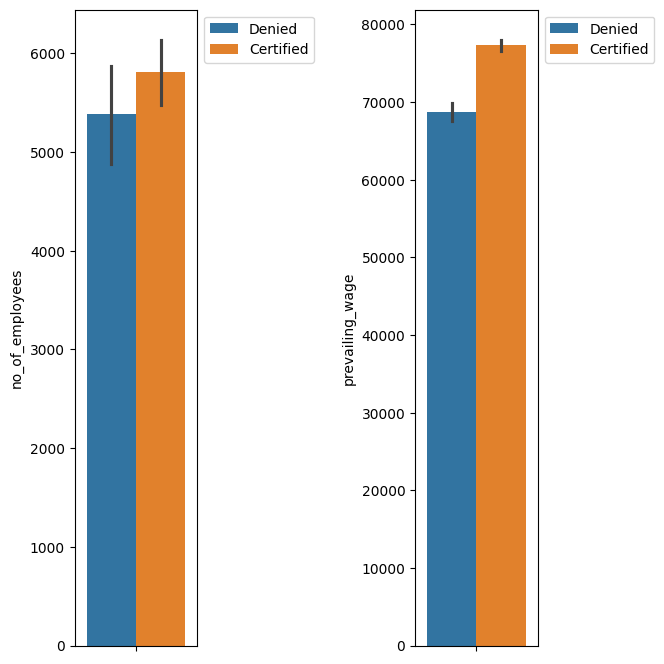

In [14]:
fig,ax=plt.subplots(1,2,figsize=(7,7))
sns.barplot(data=data,y='no_of_employees',ax=ax[0],hue='case_status')
sns.barplot(data=data,y='prevailing_wage',ax=ax[1],hue='case_status')
ax[0].legend(loc='upper left',bbox_to_anchor=(1,1))
ax[1].legend(loc='upper left',bbox_to_anchor=(1,1))
plt.tight_layout(pad=2)
plt.show()

- Years are not suitable for statistical calculations like bar plots, so I am omitting them to avoid misleading interpretations.

- From the bar plot, we observe greater variation in no_of_employees compared to prevailing_wage, and the average values for certified visas are higher in both cases.

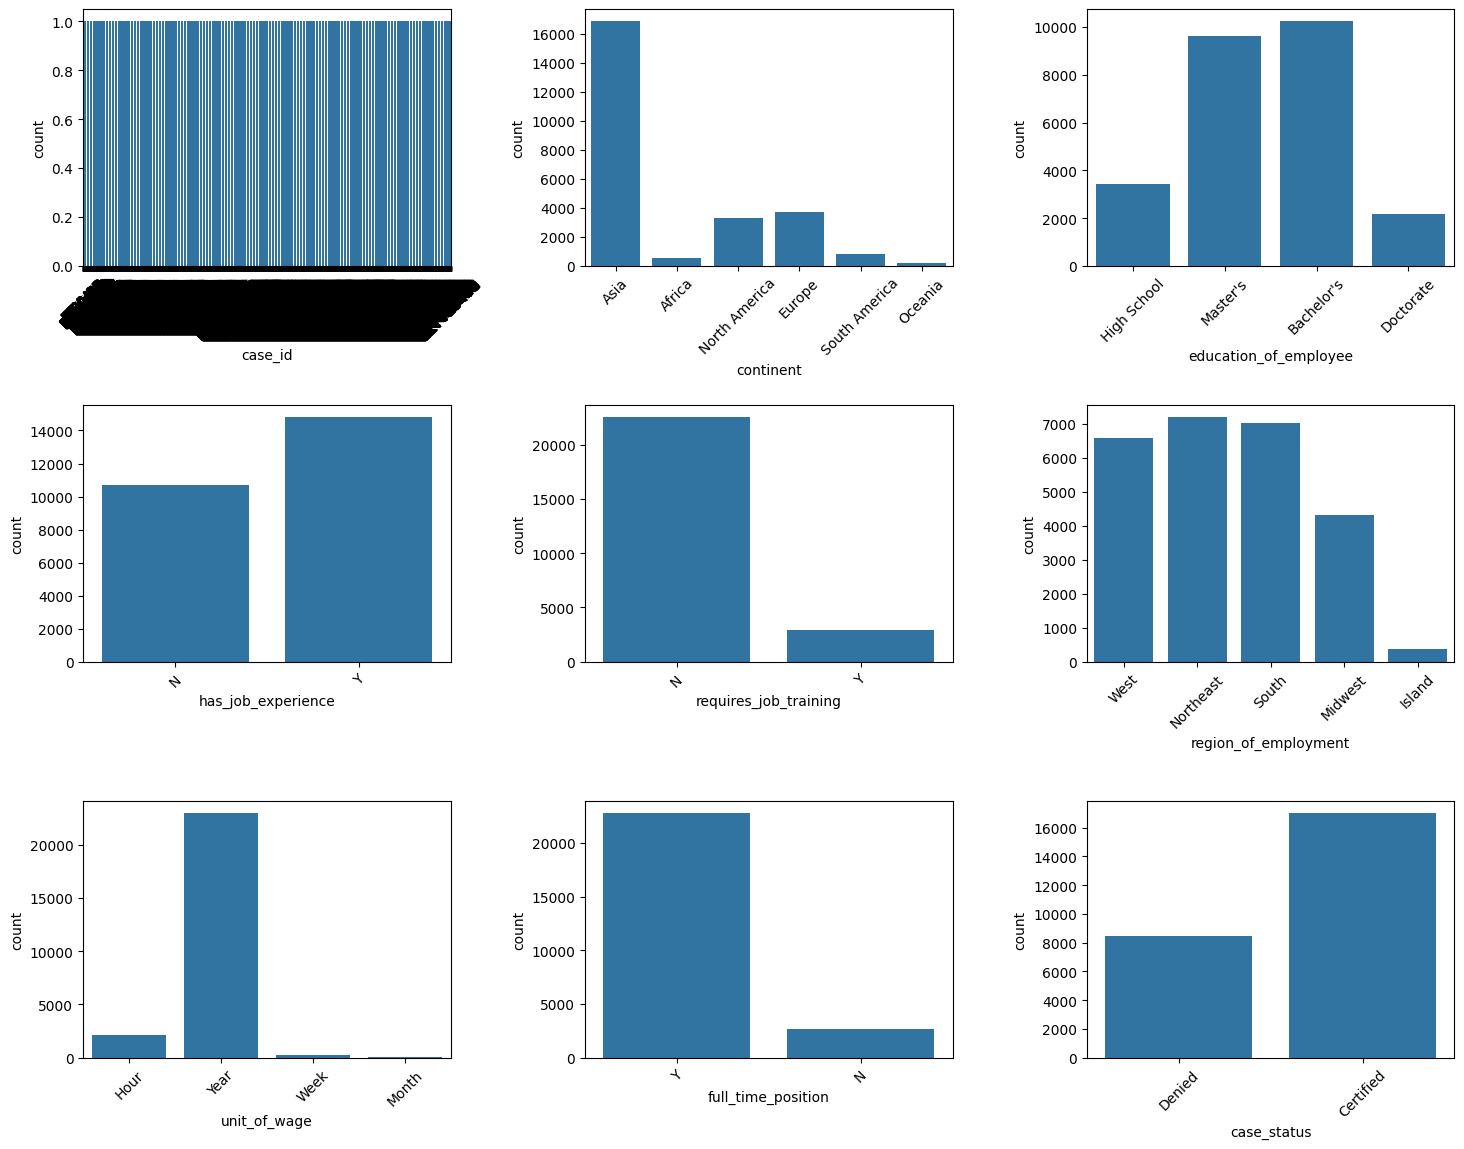

In [15]:
plt.figure(figsize=(15,15))
for i,feature in enumerate(categorical_columns):
  plt.subplot(4,3,i+1)
  sns.countplot(data=data,x=feature)
  plt.tight_layout(pad=2)
  plt.xticks(rotation=45)

plt.show()


- case_id is a unique identifier and doesn’t contribute to analysis; it can be dropped.

- Most applicants are from Asia, with North America and Europe far behind.

- A majority of employees hold a Bachelor’s or Master’s degree, while Doctorates and High School are less common.

- Most applicants have prior job experience (has_job_experience = Y), but few require job training.

- The Northeast, South, and West regions dominate in employment counts.

- The most common wage unit is Year, followed by Hour. Month and Week are rarely used.

- Most positions are full-time (full_time_position = Y).

- The number of Certified visa cases is noticeably higher than Denied ones.

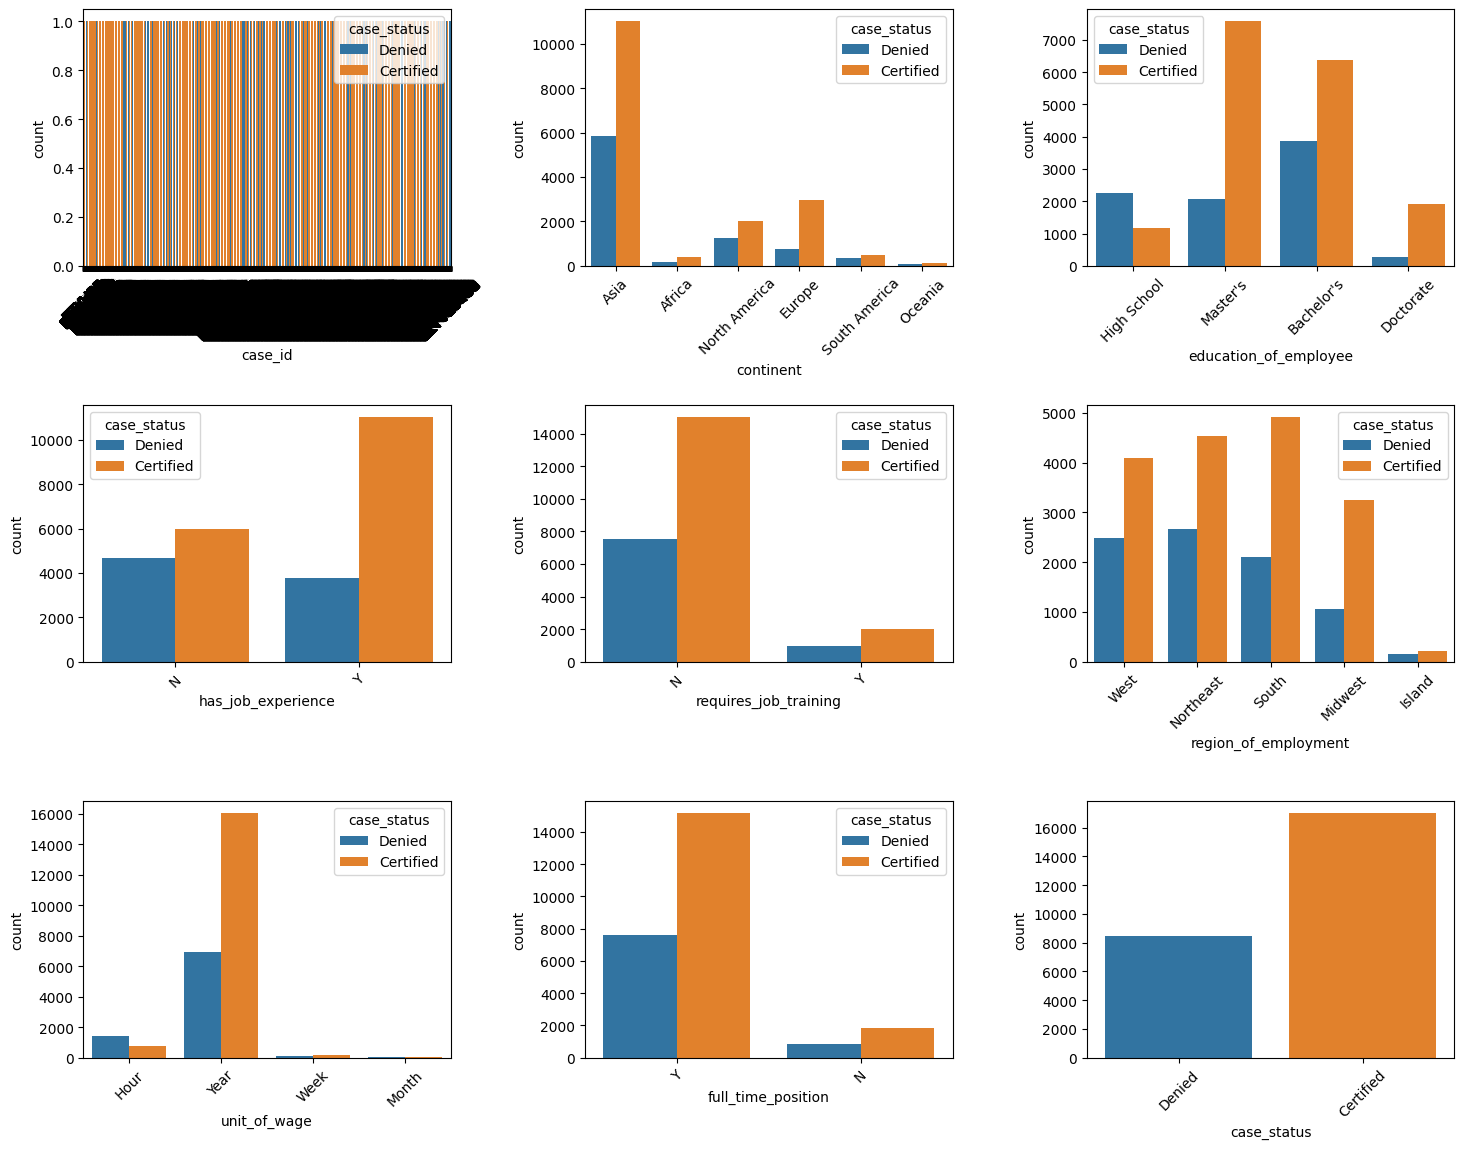

In [16]:
plt.figure(figsize=(15,15))
for i,feature in enumerate(categorical_columns):
  plt.subplot(4,3,i+1)
  sns.countplot(data=data,x=feature,hue='case_status')
  plt.tight_layout(pad=2)
  plt.xticks(rotation=45)

plt.show()


- We can visually observe the class distribution between Certified and Denied visa cases across all categorical variables. In most categories, the number of Certified cases significantly exceeds the number of Denied cases, indicating a strong imbalance in visa approval. This dominance of approved applications is consistent throughout the dataset.

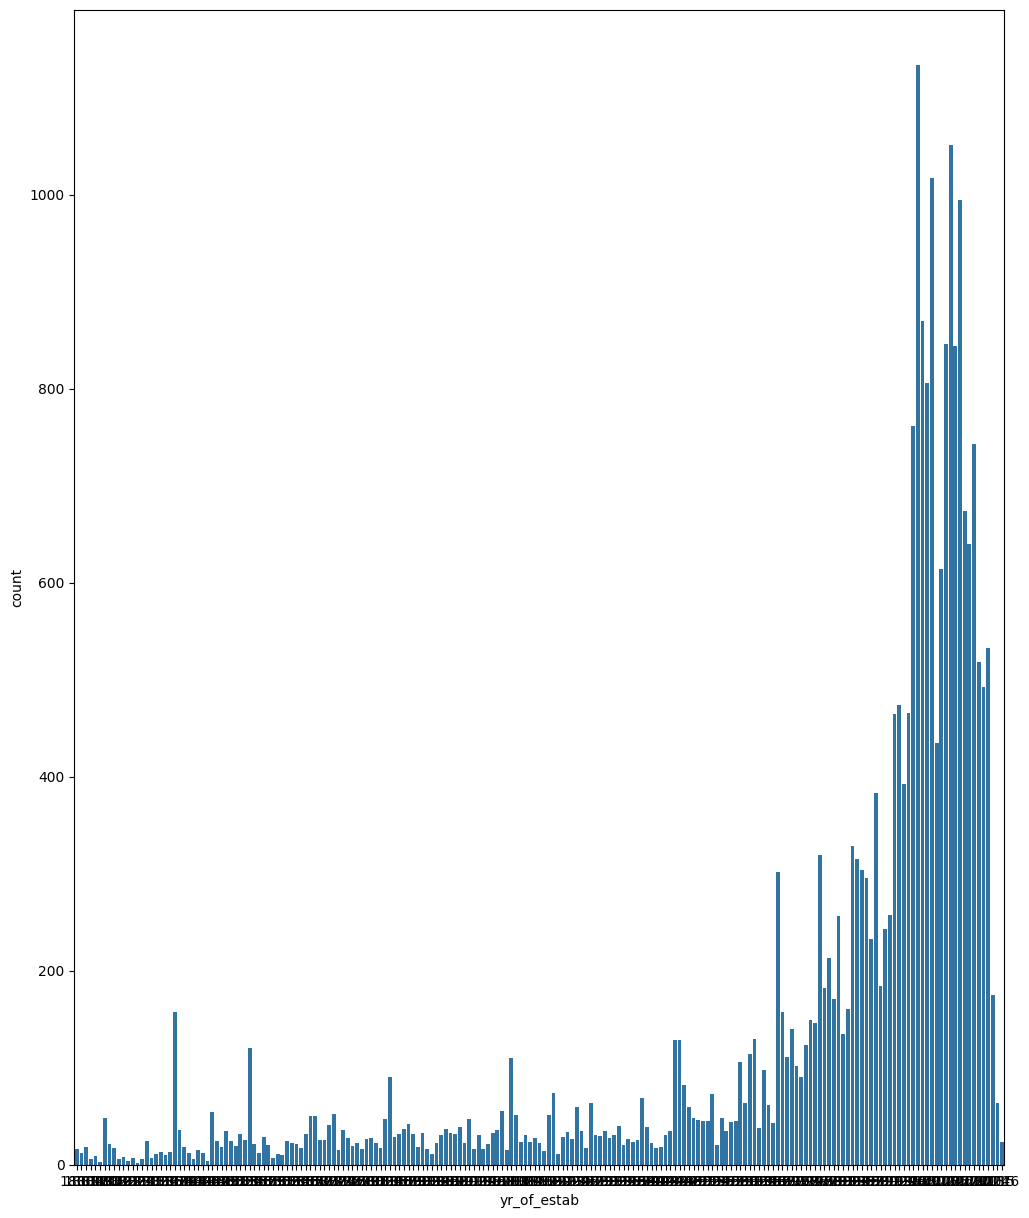

In [17]:
plt.figure(figsize=(12,15))
sns.countplot(data=data,x='yr_of_estab',)
plt.show()

- We avoided using yr_of_estab in bar and box plots because it's a time-based variable, and applying mathematical operations or aggregations on it can be misleading. Additionally, using it directly in a countplot is not effective due to its 199 unique values, which results in a cluttered plot. To make the visualization meaningful, we will now use only the top 15 most frequent years in the next plot.



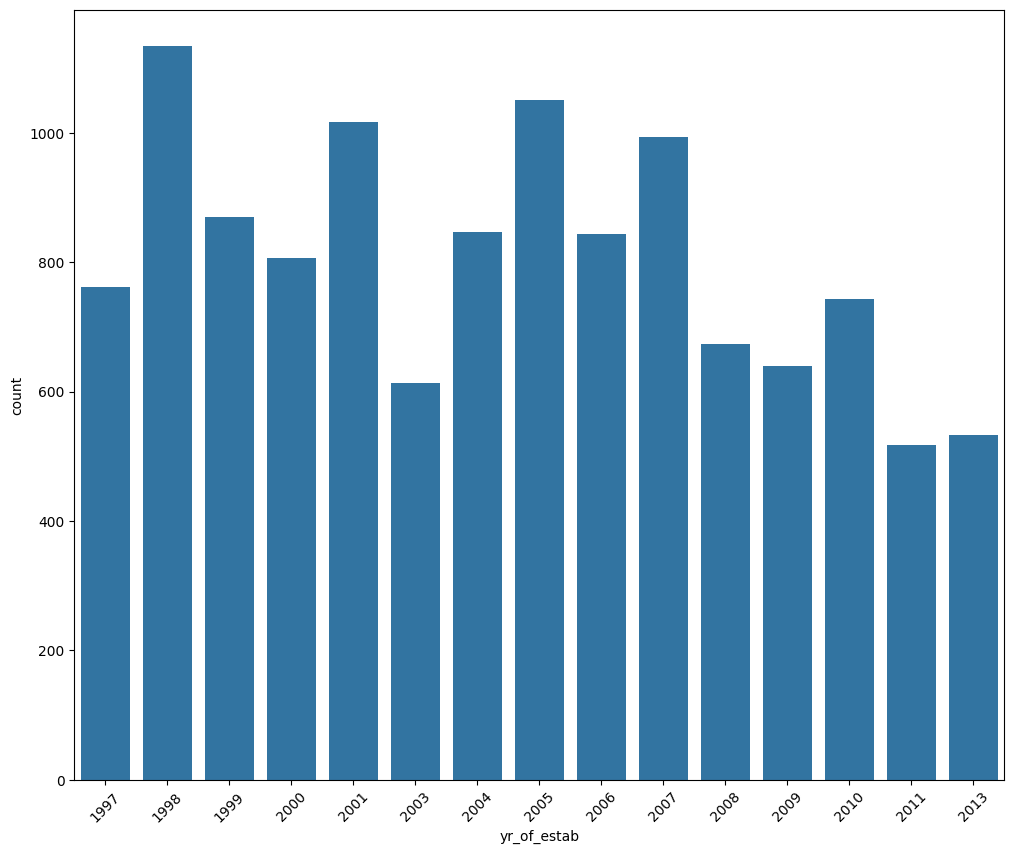

In [18]:
year_series=data['yr_of_estab'].value_counts().head(15)
plt.figure(figsize=(12,10))
sns.barplot(data=year_series)
plt.xticks(rotation=45)
plt.show()

- There isn’t a clear trend in the establishment years, but we can see that the year 1998 has the highest number of companies, with around 1134. This is followed by 2005 and 2001. Notably, the top 10 most common years are largely dominated by companies that were established after the year 2000, indicating a surge in company formations in the 2000s.

## **Bivariate Analysis**

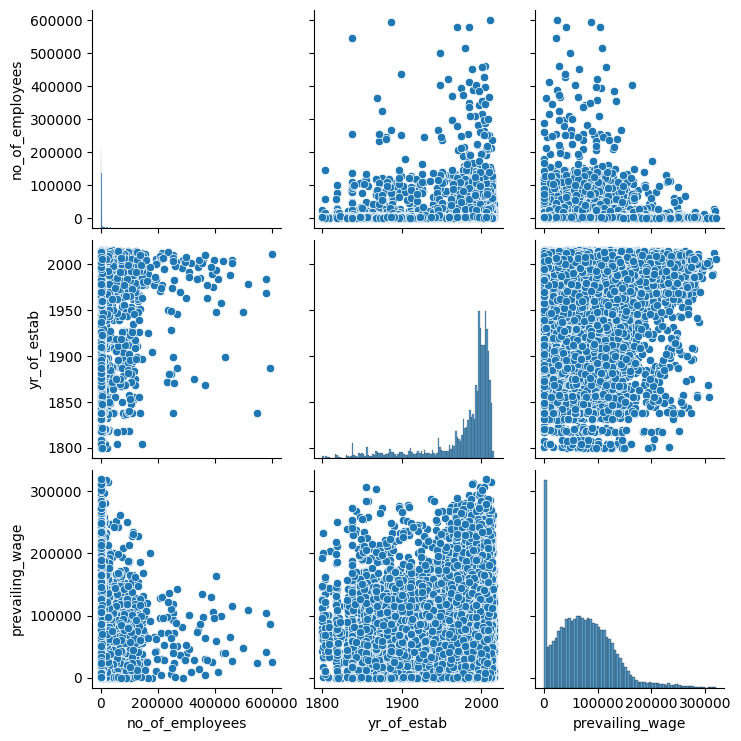

In [19]:
sns.pairplot(data)


- No strong linear relationship between variables.

- Year of establishment mostly between 1800 and 2020, skewed to recent years.

- Employee count and wages have extreme outliers.

- Prevailing wage is right-skewed (most values low, few very high).

- Most companies have relatively few employees.

- No clear correlation between year established and employee count or wage.

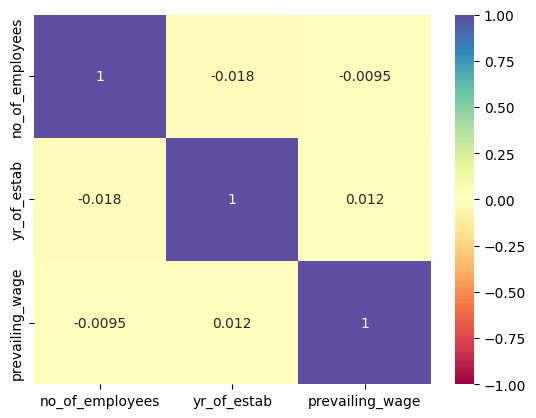

In [20]:
sns.heatmap(data[['no_of_employees','yr_of_estab','prevailing_wage']].corr(),annot=True,vmax=1,vmin=-1,cmap='Spectral')
plt.show()

- Out of the 12 columns in our dataset, only 3 are numerical, and the correlation matrix confirms that there's no meaningful linear relationship between them — all correlation values are close to zero.

- **Among the remaining 9 categorical columns, at least 6 have only 2 unique values (i.e., binary categories). Since our target variable (case_status) is also binary, using correlation isn’t effective here.**

- **Instead, the most appropriate method to explore relationships between these binary and categorical variables is through crosstab analysis or countplots with hue='case_status', which give clearer insights into how feature values relate to visa approval outcomes.**

In [21]:
data[data.columns.tolist()].nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
no_of_employees,7105
yr_of_estab,199
region_of_employment,5
prevailing_wage,25454
unit_of_wage,4


 - From the data summary, we can see that around 7 columns have a low number of unique values and are categorical in nature. These include variables like has_job_experience, requires_job_training, full_time_position, and others. Since these features — along with our target variable (case_status) — are binary or have very few categories, the most appropriate way to analyze their relationship with the target is through crosstab analysis or countplots with hue='case_status', rather than correlation or numerical methods.

In [22]:
k=pd.crosstab(data['continent'],data['case_status'],normalize=('index'))*100

case_status    Certified     Denied
continent                          
Africa         72.050817  27.949183
Asia           65.310480  34.689520
Europe         79.233655  20.766345
North America  61.877278  38.122722
Oceania        63.541667  36.458333
South America  57.863850  42.136150 



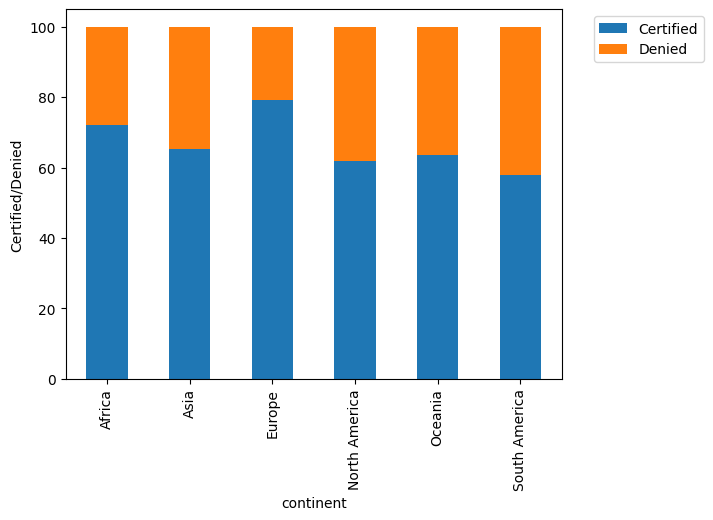

In [23]:
print(k,'\n')
k.plot(stacked=True,kind='bar')
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))
plt.ylabel('Certified/Denied')
plt.show()

[case_status    Certified     Denied
continent                          
Africa         72.050817  27.949183
Asia           65.310480  34.689520
Europe         79.233655  20.766345
North America  61.877278  38.122722
Oceania        63.541667  36.458333
South America  57.863850  42.136150, case_status            Certified     Denied
education_of_employee                      
Bachelor's             62.214188  37.785812
Doctorate              87.226277  12.773723
High School            34.035088  65.964912
Master's               78.627777  21.372223, case_status         Certified     Denied
has_job_experience                      
N                   56.134108  43.865892
Y                   74.476422  25.523578, case_status            Certified     Denied
requires_job_training                      
N                      66.645949  33.354051
Y                      67.884941  32.115059, case_status           Certified     Denied
region_of_employment                      
Island           

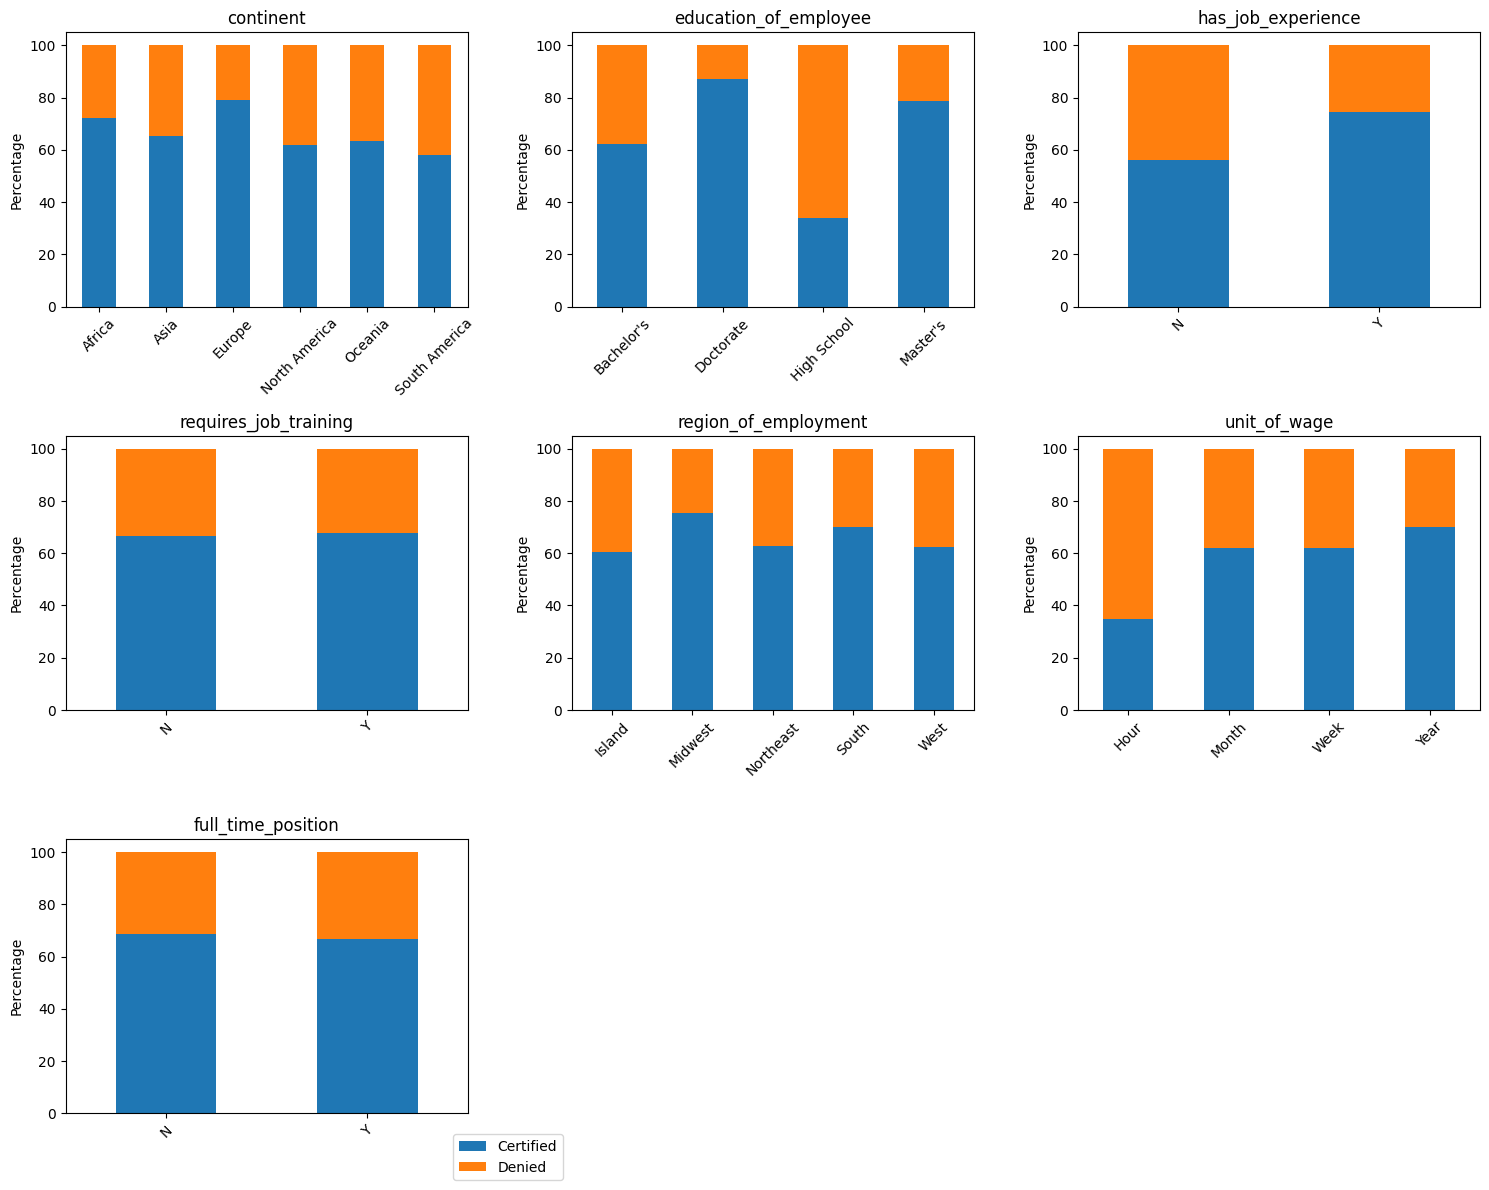

In [24]:
import matplotlib.pyplot as plt

unique_list = ['continent', 'education_of_employee', 'has_job_experience',
               'requires_job_training', 'region_of_employment',
               'unit_of_wage', 'full_time_position']
bar_values=[]

plt.figure(figsize=(15, 12))  # Adjust figure size as needed

for i, feature in enumerate(unique_list):
    plt.subplot(3, 3, i + 1)  # 3x3 layout (7 plots total)
    bar = pd.crosstab(data[feature], data['case_status'], normalize='index') * 100
    bar_values.append(bar)
    bar.plot(kind='bar', stacked=True, ax=plt.gca(), legend=False)
    plt.title(feature)
    plt.ylabel('Percentage')
    plt.xlabel('')
    plt.xticks(rotation=45)
print(bar_values)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, -0.05))
plt.tight_layout()
plt.show()


- Continent:

 - Europe and Africa show higher proportions of visa certifications compared to denial.

 - South America and North America have relatively higher denial rates but certifications still dominate.

- Education of Employee:

 - Applicants with Doctorate and Master’s degrees have a noticeably higher approval rate.

 - High School level applicants show the highest denial rates, indicating education level impacts visa approval likelihood.

- Has Job Experience:

 - Applicants with job experience (Y) have a higher visa approval rate compared to those without experience (N).

- Requires Job Training:

 - Both groups (those requiring training and those not) have similar approval to denial ratios, but slight edge towards certification in both.

- Region of Employment:

 - Midwest and South regions exhibit higher approval rates.

 - Island and Northeast regions have comparatively higher denial rates.

- Unit of Wage:

 - Most applicants paid by Month, Week, or Year show higher certification rates.

 - Hourly wage earners have a higher denial proportion.

- Full Time Position:

 - Full-time employees have a better approval rate compared to part-time, though the difference is modest.

# **DATA PRE-PROCESSING**

In [25]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


- We dont have any missing values

In [26]:
data.duplicated().sum()

np.int64(0)

- We dont have any duplicated row as well

## **Analyzing patterns in negative values and treating outliers in the no_of_employees column.**

In [27]:
print(f'The percentage of no_of_employees that has negative values is {(data.loc[data["no_of_employees"] < 0, "no_of_employees"].shape[0] / data.shape[0]) * 100:0.2f}')


The percentage of no_of_employees that has negative values is 0.13


In [28]:
print(f"There are {data.loc[data['no_of_employees'] < 0, 'no_of_employees'].shape[0]} negative values in 'no_of_employees', with {data.loc[data['no_of_employees'] < 0, 'no_of_employees'].nunique()} unique values among them.")


There are 33 negative values in 'no_of_employees', with 5 unique values among them.


In [29]:
data.loc[data['no_of_employees']<0,'no_of_employees']=data['no_of_employees']*-1

- Since the negative values are nearly 0.13% of the data and only 5 unique values are repeatedly occurring, we are converting the negative values to their absolute form. This approach retains potentially meaningful data while eliminating the impact of negative signs, which are likely due to data entry errors or inconsistencies.

In [30]:
(data.select_dtypes(include=['number']) > 0).all()

,0
no_of_employees,True
yr_of_estab,True
prevailing_wage,True


- We can confirm that all numerical values in our dataset are greater than zero.

In [31]:
# Calculate the 1st quartile (25th percentile)
Q1 = data['no_of_employees'].quantile(0.25)

# Calculate the 3rd quartile (75th percentile)
Q3 = data['no_of_employees'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower bound for outliers (anything below this is an outlier)
inner_bound = Q1 - 1.5 * IQR

# Define the upper bound for outliers (anything above this is an outlier)
outer_bound = Q3 + 1.5 * IQR

# Display the calculated values
print(f'The value of Q1 (25th percentile) is {Q1}, and the value of Q3 (75th percentile) is {Q3}')
print(f'The Interquartile Range (IQR) is {IQR}')
print(f'Outliers are defined as values less than {inner_bound:.2f} or greater than {outer_bound:.2f}')
print(f"The percentage of companies with employee count greater than the upper bound (considered as outliers) is {((data.loc[data['no_of_employees'] > 7228].shape[0] / data.shape[0]) * 100):.2f}%")


The value of Q1 (25th percentile) is 1022.0, and the value of Q3 (75th percentile) is 3504.0
The Interquartile Range (IQR) is 2482.0
Outliers are defined as values less than -2701.00 or greater than 7227.00
The percentage of companies with employee count greater than the upper bound (considered as outliers) is 6.11%


- Observation:

 - The value of Q1 (25th percentile) is 1,022, and Q3 (75th percentile) is 3,504, giving an IQR of 2,482.

 - Based on the IQR rule, outliers are defined as values less than -2,701 or greater than 7,227.

 - Since the lower bound is negative (which is not valid for employee count), we ignore it.

 - About 6.11% of companies have employee counts above the upper threshold, and are statistically outliers.

 - However, these outliers are valid and rare large companies, and we are using tree-based models, which are generally robust to outliers.

- Conclusion:
 - I have decided not to drop these outliers because:

 - They constitute a small portion of the data.

 - Tree-based models can handle them well.

 - These high employee counts may carry important business signal for prediction.



## **Converting wages to yearly scale and handling outliers in the prevailing_wage column based on unit_of_wage**

In [32]:
data['unit_of_wage'].value_counts(1)*100

,proportion
unit_of_wage,
Year,90.117739
Hour,8.465463
Week,1.067504
Month,0.349294


- Approximately 90% of the salaries are already reported on a yearly basis.

- We will convert the remaining wages (hourly, weekly, monthly) to their equivalent yearly values for consistency.

- This standardization ensures that the model splits on wage values are meaningful and comparable, leading to better interpretability and more accurate predictions.(We are assuming that 40 hours per week)

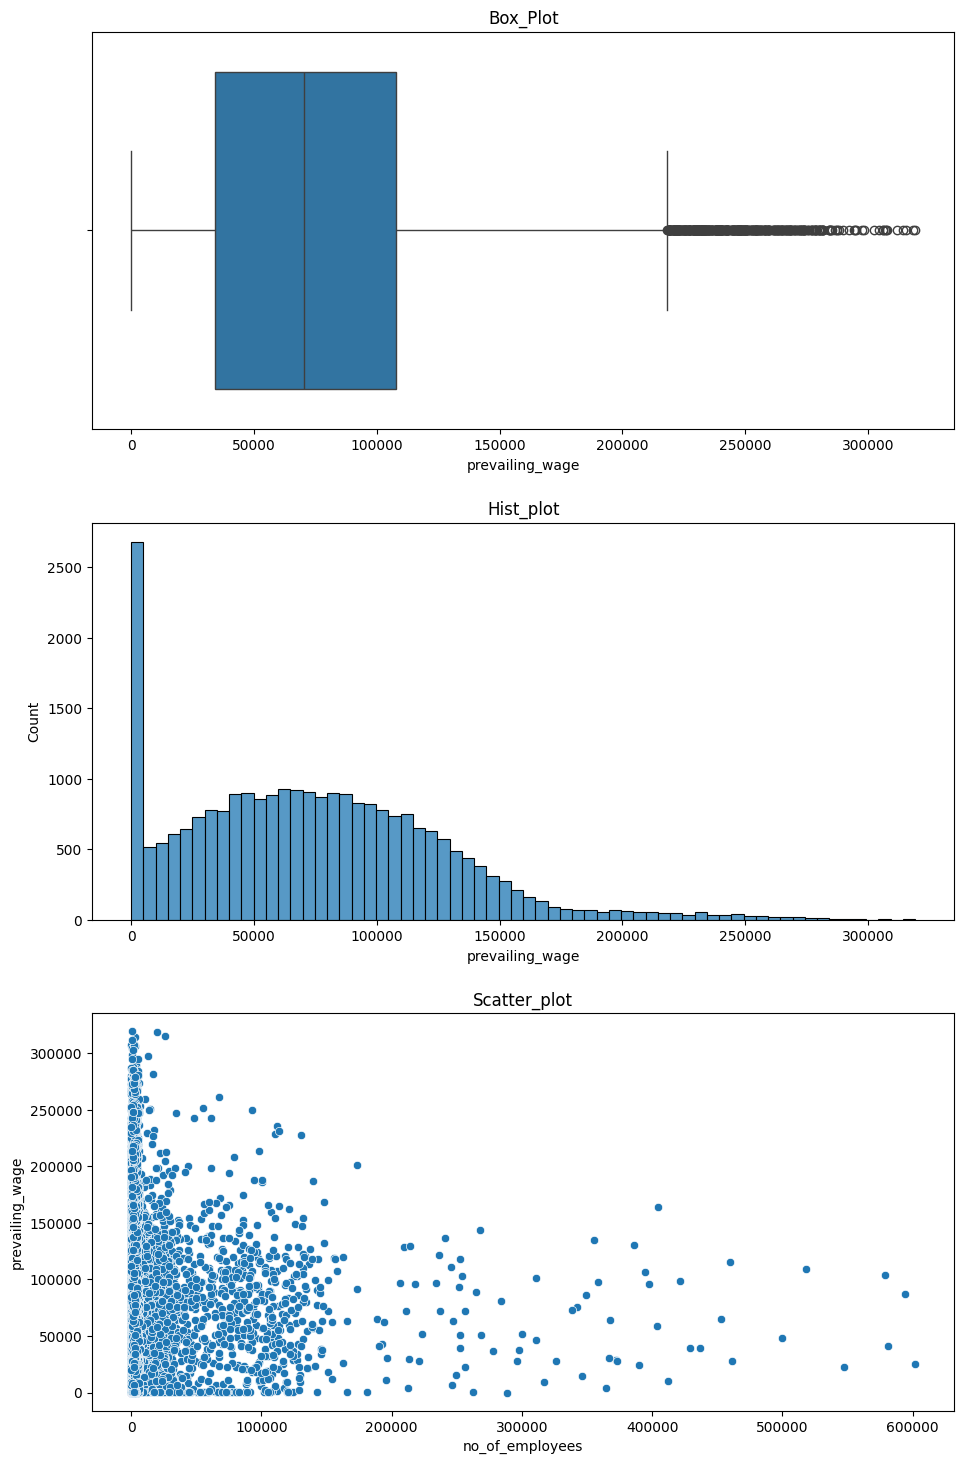

In [33]:
# Create a figure with 3 subplots arranged vertically and set the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Boxplot to visualize the distribution and outliers in 'prevailing_wage'
sns.boxplot(data=data, x='prevailing_wage', ax=ax[0])
ax[0].set_title('Box_Plot')  # Title for the boxplot

# Histogram to show the frequency distribution of 'prevailing_wage'
sns.histplot(data=data, x='prevailing_wage', ax=ax[1])
ax[1].set_title('Hist_plot')  # Title for the histogram

# Scatter plot to explore relationship between 'no_of_employees' and 'prevailing_wage'
sns.scatterplot(data=data, x='no_of_employees', y='prevailing_wage', ax=ax[2])
ax[2].set_title('Scatter_plot')  # Title for the scatter plot

# Adjust layout to prevent overlapping of subplots
plt.tight_layout(pad=2)


- The current statistical plots of prevailing_wage are not reliable due to inconsistent wage units (e.g., Hour, Week, Year). To ensure meaningful analysis, all wages must be standardized to a common unit, such as yearly wage.

In [34]:
data.loc[data['unit_of_wage']=='Hour','prevailing_wage']=data.loc[data['unit_of_wage']=='Hour','prevailing_wage']*40*52

- We are converting all hourly wages to an annual basis by assuming 40 working hours per week and 52 weeks in a year.

In [35]:
data.loc[data['unit_of_wage']=='Week','prevailing_wage']=data.loc[data['unit_of_wage']=='Week','prevailing_wage']*52

- We are converting all weekly wages to an annual basis by multiplying them by 52 weeks per year.

In [36]:
data.loc[data['unit_of_wage']=='Month','prevailing_wage']=data.loc[data['unit_of_wage']=='Month','prevailing_wage']*12

- We are converting all monthly wages to an annual basis by multiplying them by 12 months per year.

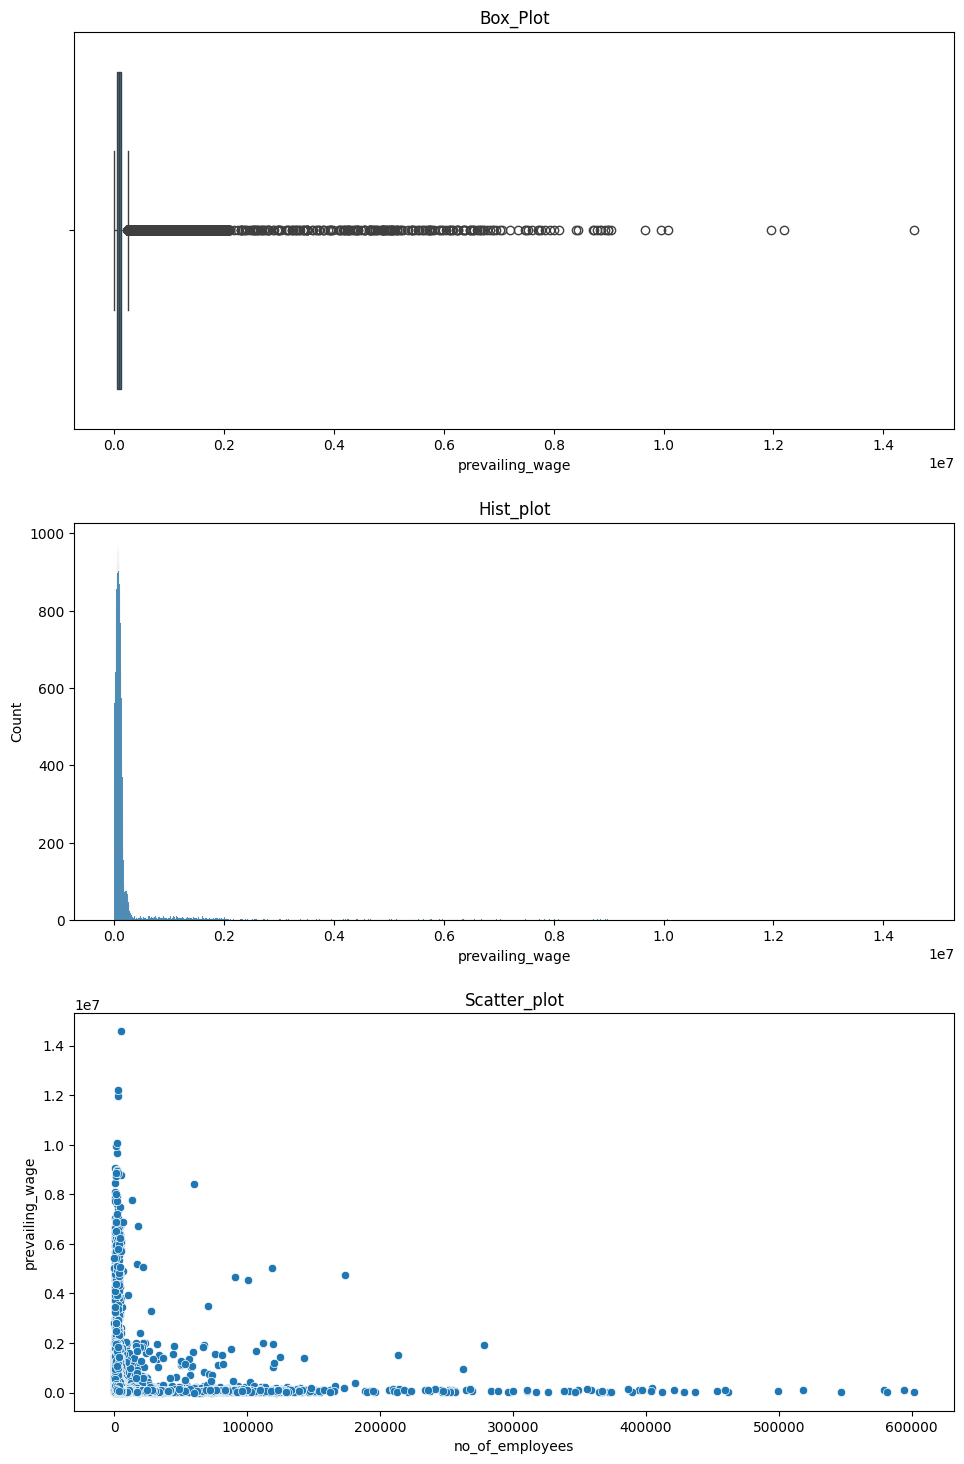

In [37]:
# Create a figure with 3 subplots arranged vertically and set the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Boxplot to visualize the distribution and outliers in 'prevailing_wage'
sns.boxplot(data=data, x='prevailing_wage', ax=ax[0])
ax[0].set_title('Box_Plot')  # Title for the boxplot

# Histogram to show the frequency distribution of 'prevailing_wage'
sns.histplot(data=data, x='prevailing_wage', ax=ax[1])
ax[1].set_title('Hist_plot')  # Title for the histogram

# Scatter plot to explore relationship between 'no_of_employees' and 'prevailing_wage'
sns.scatterplot(data=data, x='no_of_employees', y='prevailing_wage', ax=ax[2])
ax[2].set_title('Scatter_plot')  # Title for the scatter plot

# Adjust layout to prevent overlapping of subplots
plt.tight_layout(pad=2)


- Before Conversion:

 - The wage data showed a mixed distribution due to different units (hourly, weekly, monthly, yearly).

 - The boxplot and histogram had moderate skewness but the scale of wages was more contained.

 - The variation was spread out according to different wage units, making direct comparisons difficult.

 - Some outliers were present, but extreme values were less pronounced due to inconsistent units.

- After Conversion:

 - All wages were standardized to an annual basis for uniformity.

 - The distribution became significantly more skewed, with extreme outliers amplified.

 - Very high converted wages (especially from hourly or monthly multiplied values) stretched the scale, causing the boxplot whiskers and histogram tail to extend further.

 - The increased skewness and extreme values reduce the clarity of data patterns and make statistical analysis more challenging without further outlier handling or transformations.

In [38]:
# Calculate the 1st quartile (25th percentile)
Q1 = data['prevailing_wage'].quantile(0.25)

# Calculate the 3rd quartile (75th percentile)
Q3 = data['prevailing_wage'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower bound for outliers (anything below this is an outlier)
inner_bound = Q1 - 1.5 * IQR

# Define the upper bound for outliers (anything above this is an outlier)
outer_bound = Q3 + 1.5 * IQR

# Display the calculated values
print(f'The value of Q1 (25th percentile) is {Q1}, and the value of Q3 (75th percentile) is {Q3}')
print(f'The Interquartile Range (IQR) is {IQR}')
print(f'Outliers are defined as values less than {inner_bound:.2f} or greater than {outer_bound:.2f}')
print(f"The percentage of companies with employee count greater than the upper bound (considered as outliers) is {((data.loc[data['prevailing_wage'] > 124826].shape[0] / data.shape[0]) * 100):.2f}%")


The value of Q1 (25th percentile) is 47107.965, and the value of Q3 (75th percentile) is 124825.035
The Interquartile Range (IQR) is 77717.07
Outliers are defined as values less than -69467.64 or greater than 241400.64
The percentage of companies with employee count greater than the upper bound (considered as outliers) is 25.00%


- The 25th percentile (Q1) wage is $47,108, and the 75th percentile (Q3) is $124,825.

- The Interquartile Range (IQR) is $77,717, representing typical salary spread.

- Outliers are defined as wages above $241,401 or below $-69,468 (though negative wages are not valid).

- Around 25% of the companies fall above the upper outlier threshold.

- These high salaries may indicate senior roles, niche skills, or potential anomalies worth deeper inspection.

In [39]:
# Count how many people earn ≤ $20,000
print(data.loc[data['prevailing_wage'] <= 20000].shape,'\n')

# Print percentage of people earning ≤ $20,000
print(f"The percentage of people earning less than or equal to $20,000 is {(data.loc[data['prevailing_wage'] <= 20000].shape[0] / data.shape[0]) * 100:.2f}%")


(2192, 12) 

The percentage of people earning less than or equal to $20,000 is 8.60%


In [40]:
data = data.loc[data['prevailing_wage'] >= 20000]


- To ensure realistic and visa-compliant wage data for foreign workers, we applied a minimum salary filter of $20,000/year. Here's the reasoning behind this decision:

- U.S. federal minimum wage equates to ~$15,080/year for full-time roles (40 hrs/week).

- Foreign worker visa programs (e.g., H-1B, L-1) generally require prevailing wages starting from $50,000–$60,000/year.

- Wages below $10,000/year are highly likely to be data entry errors or non-salaried/part-time roles.

- Using $20,000 as a cutoff is a balanced threshold — removing clearly unrealistic entries while retaining potentially valid edge cases.

- This step improves data quality and reliability for downstream modeling or insights.



In [41]:
# Calculate the 1st quartile (25th percentile)
Q1 = data['prevailing_wage'].quantile(0.25)

# Calculate the 3rd quartile (75th percentile)
Q3 = data['prevailing_wage'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower bound for outliers (anything below this is an outlier)
inner_bound = Q1 - 1.5 * IQR

# Define the upper bound for outliers (anything above this is an outlier)
outer_bound = Q3 + 1.5 * IQR

# Display the calculated values
print(f'The value of Q1 (25th percentile) is {Q1}, and the value of Q3 (75th percentile) is {Q3}')
print(f'The Interquartile Range (IQR) is {IQR}')
print(f'Outliers are defined as values less than {inner_bound:.2f} or greater than {outer_bound:.2f}')
print(f"The percentage of companies with employee count greater than the upper bound (considered as outliers) is {((data.loc[data['prevailing_wage'] > 124826].shape[0] / data.shape[0]) * 100):.2f}%")


The value of Q1 (25th percentile) is 56552.8625, and the value of Q3 (75th percentile) is 129629.36
The Interquartile Range (IQR) is 73076.4975
Outliers are defined as values less than -53061.88 or greater than 239244.11
The percentage of companies with employee count greater than the upper bound (considered as outliers) is 27.35%


- Removed salaries less than 20,000 to clean invalid or extreme low-end data.

- Outlier percentage increased after removal because the data shifted upward and dataset size reduced.

- Large salary outliers are valid rare cases representing senior or high-grade positions.

- Decision made to keep large salary outliers due to their business importance.

- Tree-based models are robust to outliers, so keeping these outliers won’t negatively affect model performance.

## **Feature Engineering**

In [42]:
data=data.drop('unit_of_wage',axis=1)

We are dropping the unit_of_wage column because all wages are now converted to the same unit (yearly), making this column redundant and not useful for analysis or modeling.

In [43]:
data=data.drop('case_id',axis=1)

- We drop case_id because it is just a unique identifier with no predictive value. It doesn’t provide meaningful information for modeling or analysis, so keeping it won’t help and may even confuse the model.

In [44]:
for i, feature in enumerate(data.columns):
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature])


- Converting to categorical is a simple, low-cost step that makes your data cleaner, more memory efficient, and ready for encoding — it’s often the best starting point before applying one-hot or label encoding.

## **Split the data into train and test sets**

In [45]:
# Drop the target column 'case_status' from the dataset to create the feature set
x = data.drop('case_status', axis=1)

# Extract the target column 'case_status' as the label set
y = data['case_status']


In [46]:
# First split: 50% train, 50% temp (val + test)
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, random_state=RS, test_size=0.5, stratify=y
)

# Second split: 30% test, 70% val from the 50% temp
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, random_state=RS, test_size=0.3, stratify=y_temp
)

In [47]:
print(f'The number of rows in x is {x.shape[0]} and the column is {x.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in training set of x is {x_train.shape[0]} and the column is {x_train.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_train.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in validation set of x is {x_val.shape[0]} and the column is {x_val.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_val.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in test set of x is {x_test.shape[0]} and the column is {x_test.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_test.value_counts(1)}\n")

The number of rows in x is 23288 and the column is 9 

******************************************************************************** 

The percentage of classes in y is case_status
Certified    0.661371
Denied       0.338629
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in training set of x is 11644 and the column is 9 

******************************************************************************** 

The percentage of classes in y is case_status
Certified    0.661371
Denied       0.338629
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in validation set of x is 8150 and the column is 9 

******************************************************************************** 

The percentage of classes in y is case_status
Certified    0.66135
Denied       0.33865
Name: proportion, dtype: float64

*****************

In [48]:
# One-hot encode training data
x_train = pd.get_dummies(x_train, columns=['continent', 'region_of_employment'], drop_first=True)

# One-hot encode val and test separately, then align columns to train
x_val = pd.get_dummies(x_val, columns=['continent', 'region_of_employment'], drop_first=True)
x_val = x_val.reindex(columns=x_train.columns, fill_value=0)

x_test = pd.get_dummies(x_test, columns=['continent', 'region_of_employment'], drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)


In [49]:
# Replace categorical values with numeric codes in train, val, and test sets
replace_values = {
    'education_of_employee': {'Doctorate': 1, "Master's": 2, "Bachelor's": 3, 'High School': 4},
    'has_job_experience': {'Y': 1, "N": 0},
    'requires_job_training': {'Y': 1, "N": 0},
    'full_time_position': {'Y': 1, "N": 0}
}

x_train = x_train.replace(replace_values)
x_val = x_val.replace(replace_values)
x_test = x_test.replace(replace_values)


In [50]:
# Convert all columns in train, val, and test sets to float type
x_train = x_train.astype('float')
x_val = x_val.astype('float')
x_test = x_test.astype('float')


In [51]:
# Map target labels to numeric values in train, val, and test sets
y_train = y_train.map({'Certified': 1, 'Denied': 0})
y_val = y_val.map({'Certified': 1, 'Denied': 0})
y_test = y_test.map({'Certified': 1, 'Denied': 0})


In [52]:
print(f'The number of rows in x is {x.shape[0]} and the column is {x.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in training set of x is {x_train.shape[0]} and the column is {x_train.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_train.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in validation set of x is {x_val.shape[0]} and the column is {x_val.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_val.value_counts(1)}\n")
print('*'*80,'\n')
print(f'The number of rows in test set of x is {x_test.shape[0]} and the column is {x_test.shape[1]} \n')
print('*'*80,'\n')
print(f"The percentage of classes in y is {y_test.value_counts(1)}\n")

The number of rows in x is 23288 and the column is 9 

******************************************************************************** 

The percentage of classes in y is case_status
Certified    0.661371
Denied       0.338629
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in training set of x is 11644 and the column is 16 

******************************************************************************** 

The percentage of classes in y is case_status
1    0.661371
0    0.338629
Name: proportion, dtype: float64

******************************************************************************** 

The number of rows in validation set of x is 8150 and the column is 16 

******************************************************************************** 

The percentage of classes in y is case_status
1    0.66135
0    0.33865
Name: proportion, dtype: float64

***********************************************

- After mapping and one-hot encoding, we can observe the shapes of the datasets. The number of columns increased from 9 to 16 due to the expansion from one-hot encoding.

- We can consider our data as moderately imbalanced, so during model tuning, we need to take necessary steps like using class weights or sampling techniques to handle it properly.

# **Model Building**


## **Model Evaluation**


In [53]:
def model_evaluation (model,predictors,target,flag=True):

  score_list=[]

  pred=model.predict(predictors)

  Accuracy=accuracy_score(target,pred)

  precision=precision_score(target,pred)

  Recall=recall_score(target,pred)

  F1_score=f1_score(target,pred)

  score_list.extend((Accuracy,precision,Recall,F1_score))

  df_model=pd.DataFrame({'Accuracy':[Accuracy],'precision':[precision],'Recall':[Recall],'F1_score':[F1_score]})

  if flag==True:
    print(df_model)

  return score_list

In [54]:
def plot_confusion_matrix(model,predictors,targets,labels=[0,1]):

  y_pred=model.predict(predictors)

  cm=confusion_matrix(targets,y_pred,labels=[0,1])

  df_cm=pd.DataFrame(cm,columns=['Predicted_No','Predicted_yes'],index=['Actual_No','Actual_yes'])

  labels=np.asarray([[f'{item:0.2f}\n{item/cm.flatten().sum():0.2%}']for item in cm.flatten()]).reshape(2,2)

  sns.heatmap(df_cm,annot=labels,fmt='',cmap='viridis',cbar=False)

## **Basic Models without Resampling techniques and Tuning**

### **Decision Tree**

In [55]:
dtree=DecisionTreeClassifier(random_state=RS)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
dtree_eval=model_evaluation(dtree,x_train,y_train)

   Accuracy  precision  Recall  F1_score
0       1.0        1.0     1.0       1.0


In [57]:
dtree_eval=model_evaluation(dtree,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.648344   0.734311  0.733766  0.734039


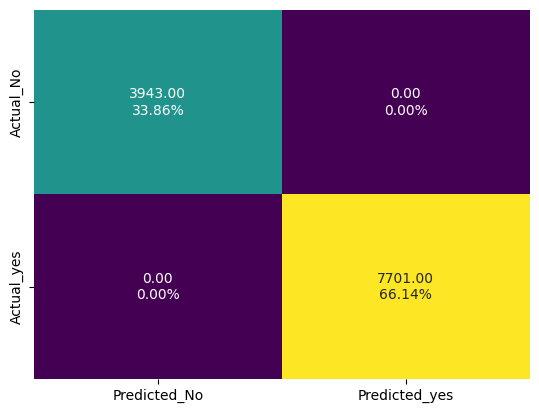

In [58]:
plot_confusion_matrix(dtree,x_train,y_train)

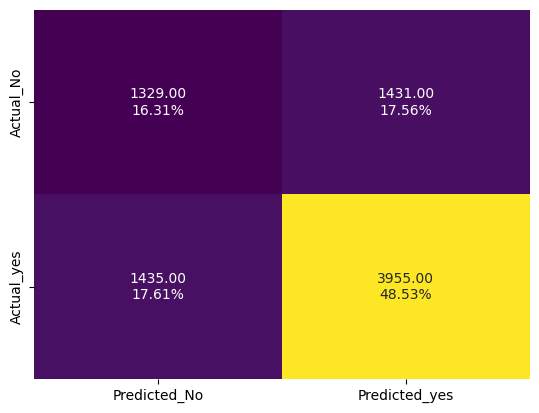

In [59]:
plot_confusion_matrix(dtree,x_val,y_val)

- Accuracy is not a reliable metric when dealing with imbalanced classes, as it can give a misleading sense of model performance by favoring the majority class.

- A Decision Tree without tuning or pruning tends to overfit the training data, resulting in high performance on the training set but poor generalization to the test set.



### **Bagging Classifier**

In [60]:
bagging_tree=BaggingClassifier(random_state=RS)
bagging_tree.fit(x_train,y_train)

BaggingClassifier(random_state=42)

In [61]:
bagging_eval=model_evaluation(bagging_tree,x_train,y_train)

   Accuracy  precision    Recall  F1_score
0  0.985314   0.991002  0.986755  0.988874


In [62]:
bagging_eval=model_evaluation(bagging_tree,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0   0.69227   0.762956  0.775696  0.769273


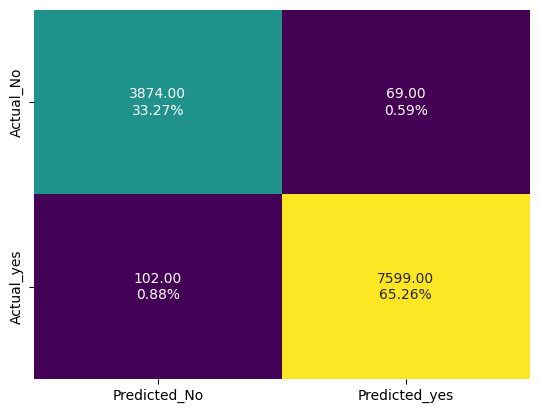

In [63]:
plot_confusion_matrix(bagging_tree,x_train,y_train)

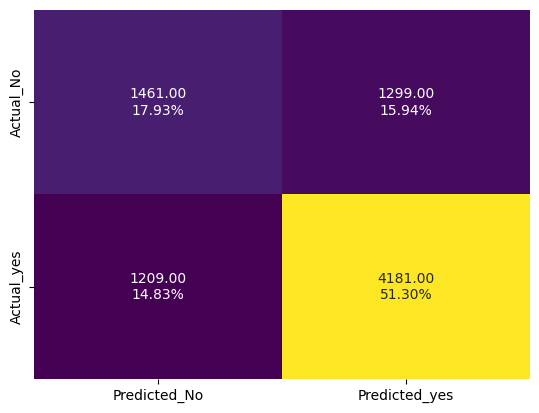

In [64]:
plot_confusion_matrix(bagging_tree,x_val,y_val)

- Bagging is an ensemble technique based on bootstrapping with replacement. It helps reduce overfitting by averaging multiple models trained on different subsets of the data, thereby preventing any single model from learning the noise in the dataset.
- However, without proper hyperparameter tuning, Bagging may still fail to generalize well to unseen data.
- In our case, since there is no clear linear relationship between the features and the target variable, logistic regression is not suitable. Therefore, we discard logistic regression with Bagging and proceed with a decision tree-based approach, which can effectively handle non-linear patterns.



### **Random Forest**

In [65]:
rand=RandomForestClassifier(random_state=RS)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [66]:
rand_eval=model_evaluation(rand,x_train,y_train)

   Accuracy  precision  Recall  F1_score
0  0.999914    0.99987     1.0  0.999935


In [67]:
rand_eval=model_evaluation(rand,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.721104   0.761362  0.842301  0.799789


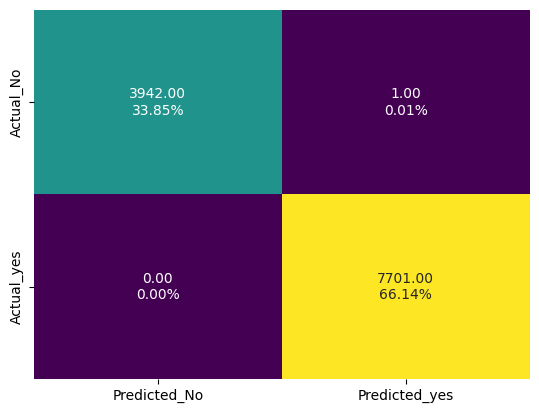

In [68]:
plot_confusion_matrix(rand,x_train,y_train)

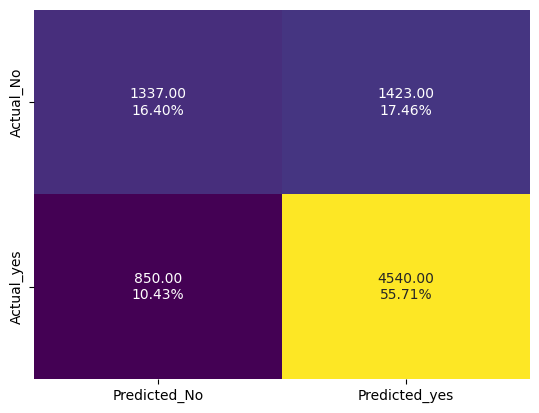

In [69]:
plot_confusion_matrix(rand,x_val,y_val)

- Random Forest is generally considered a more robust model compared to a basic Bagging Classifier, as it introduces additional randomness through feature selection at each split. In our case, we observe that the recall and F1-score are slightly better and generalize more effectively than the Bagging Classifier.

- On the training set, the model achieves near-perfect performance across all metrics. However, due to class imbalance, we do not rely on accuracy for model evaluation on the validation set. Instead, we focus on recall and F1-score, which are more informative in this context. With better hyperparameter tuning, we can potentially achieve even stronger generalization.

- Since Random Forest is based entirely on decision trees, we cannot use it with other base classifiers like logistic regression or SVM. If we wanted to combine different classifiers, we would need to explore other ensemble methods such as stacking or voting classifiers.



### **AdaBoostClassifier**

In [70]:
adaboost=AdaBoostClassifier(random_state=RS)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [71]:
adaboost_eval=model_evaluation(adaboost,x_train,y_train)


   Accuracy  precision    Recall  F1_score
0  0.728358    0.74787  0.888975  0.812341


In [72]:
adaboost_eval=model_evaluation(adaboost,x_val,y_val)


   Accuracy  precision    Recall  F1_score
0  0.727975   0.745322  0.894249  0.813022


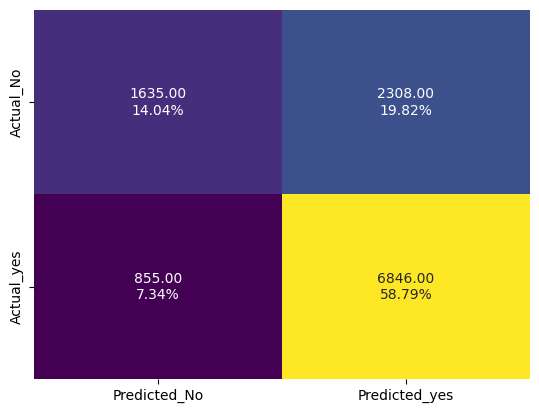

In [73]:
plot_confusion_matrix(adaboost,x_train,y_train)

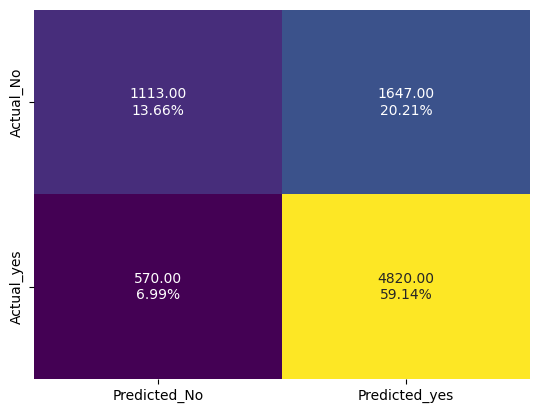

In [74]:
plot_confusion_matrix(adaboost,x_val,y_val)

- Although AdaBoost does not produce the highest performance metrics, it shows strong generalization. The training and validation scores across all key metrics—accuracy, precision, recall, and F1-score—are nearly identical, indicating that the model is not overfitting.

- Since AdaBoost uses an ensemble boosting technique, it typically employs shallow models (like decision stumps) and assigns more weight to the misclassified instances in each round, improving focus on harder examples.

- At this stage, AdaBoost can be considered the best choice for our use case because we prioritize generalization over fitting the training data perfectly. This gives us a solid foundation that can be improved further through hyperparameter tuning or resampling techniques to address class imbalance.



### **Gradient Boosting**

In [75]:
gradinet=GradientBoostingClassifier(random_state=RS)
gradinet.fit(x_train,y_train)


GradientBoostingClassifier(random_state=42)

In [76]:
gradinet_eval=model_evaluation(gradinet,x_train,y_train)


   Accuracy  precision    Recall  F1_score
0      0.75   0.773902  0.878717  0.822986


In [77]:
gradinet_eval=model_evaluation(gradinet,x_val,y_val)


   Accuracy  precision    Recall  F1_score
0  0.741718   0.763348  0.883302  0.818956


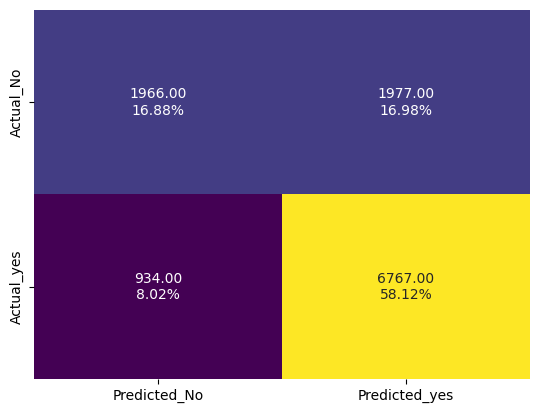

In [78]:
plot_confusion_matrix(gradinet,x_train,y_train)

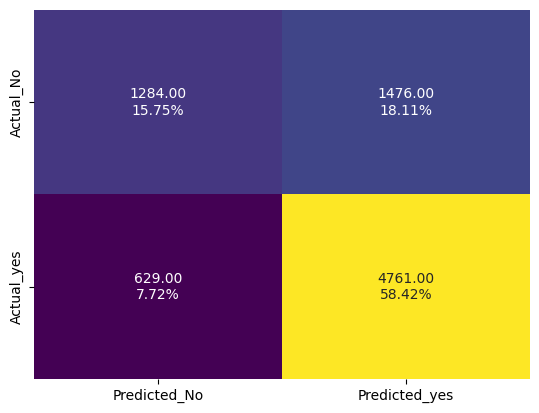

In [79]:
plot_confusion_matrix(gradinet,x_val,y_val)

 - Gradient Boosting shows slightly better overall performance compared to AdaBoost, with improved recall and F1-score on both training and validation sets. This indicates strong generalization with minimal overfitting.

- Like AdaBoost, Gradient Boosting is also a boosting ensemble method that builds models sequentially, giving more focus to previous errors. However, it uses gradient descent to minimize loss, which often results in better performance, especially with fine-tuned parameters.

- Given the consistent metrics across training and validation (Accuracy ~0.75, F1-score ~0.82), Gradient Boosting currently stands out as a strong candidate. With further tuning or class imbalance handling, it can potentially deliver even better results.



### **Important Features in best of basic model**

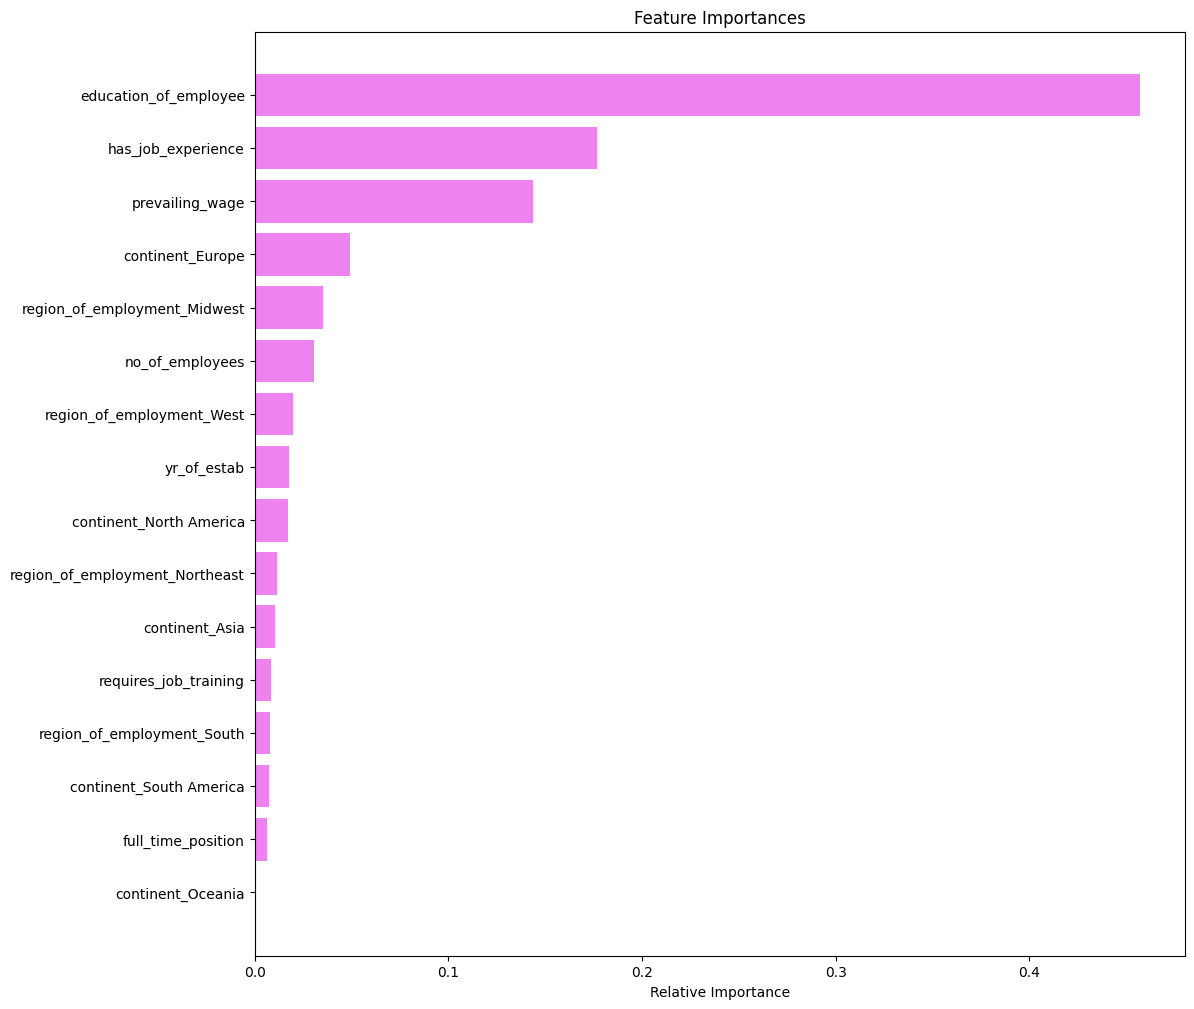

In [80]:
important_feature=gradinet.feature_importances_
indices=np.argsort(important_feature)

feature_names = list(x_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Based on the Gradient Boosting model—which we selected for its strong generalization and balanced metrics—education_of_employee is by far the most influential feature in visa approval prediction, contributing over 40% of the model’s decision-making.

- has_job_experience and prevailing_wage are also important, though their impact is significantly lower, contributing around 15–18% and 12–14% respectively.

- Other categorical and regional features such as continent_Europe, region_of_employment_Midwest, and no_of_employees have moderate importance, suggesting geography and company size have some effect on the outcome.

- Features like continent_Oceania, full_time_position, and continent_South America show minimal or almost no contribution, indicating they have little influence on the model's predictions and could potentially be dropped in future iterations for simplification.

## **Impact of Oversampling on Basic Model Performance**

### **Oversampling Data split**

In [81]:
# Creating SMOTE object with proper parameters
# sampling_strategy=0.5 means minority class will be upsampled to 50% of the majority class
over_sample = SMOTE(random_state=RS, sampling_strategy=0.6, k_neighbors=5)

# Applying SMOTE to training data
x_train_over, y_train_over = over_sample.fit_resample(x_train, y_train)


- Here, sampling_strategy=0.6 means the minority class will be upsampled to 60% of the majority class size.

- For example, if y_train has 500 samples of the majority class, then in y_over, the minority class will be increased to 300 samples (i.e., 60% of 500).

- k_neighbors=5 means SMOTE looks at the 5 nearest minority class neighbors of each sample. New synthetic points are created by interpolating between the sample and one randomly chosen neighbor.



In [82]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

print(f'The classes percentage before oversampling is {y_train.value_counts(1)*100}\n')

print(f'The classes percentage after oversampling is {y_train_over.value_counts(1)*100}')

Before OverSampling, count of label '1': 7701
Before OverSampling, count of label '0': 3943 

After OverSampling, count of label '1': 7701
After OverSampling, count of label '0': 4620 

After OverSampling, the shape of train_X: (12321, 16)
After OverSampling, the shape of train_y: (12321,) 

The classes percentage before oversampling is case_status
1    66.137066
0    33.862934
Name: proportion, dtype: float64

The classes percentage after oversampling is case_status
1    62.503044
0    37.496956
Name: proportion, dtype: float64


- Here, we increased the class balance slightly, as moving to a 1:1 ratio could lead to overfitting due to excessive synthetic data.

### **Decision Tree**

In [83]:
dtree_over=DecisionTreeClassifier(random_state=RS)
dtree_over.fit(x_train_over,y_train_over)

DecisionTreeClassifier(random_state=42)

In [84]:
dtree_eval=model_evaluation(dtree_over,x_train_over,y_train_over)

   Accuracy  precision  Recall  F1_score
0       1.0        1.0     1.0       1.0


In [85]:
dtree_eval=model_evaluation(dtree_over,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.647485   0.731384  0.738033  0.734694


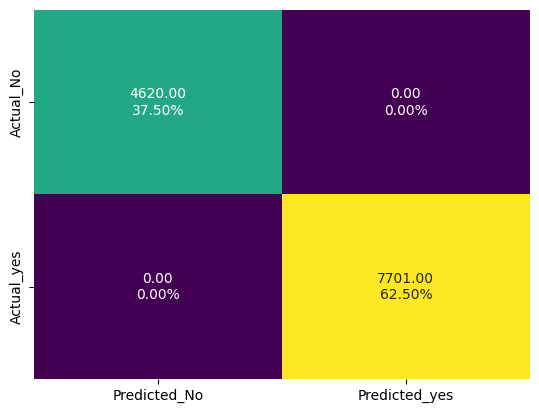

In [86]:
plot_confusion_matrix(dtree_over,x_train_over,y_train_over)

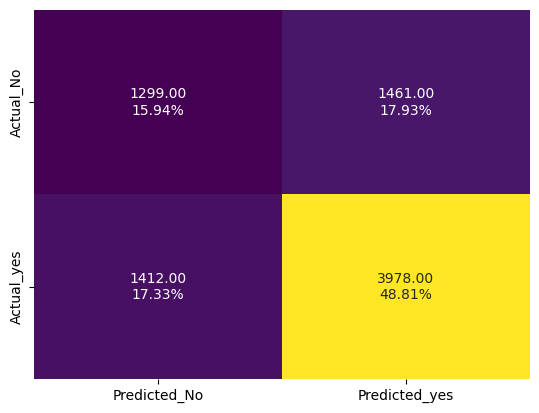

In [87]:
plot_confusion_matrix(dtree_over,x_val,y_val)

- The Decision Tree's performance improved only slightly after oversampling, as we applied a moderate oversampling ratio. As a result, the performance change is noticeable mostly at the decimal level.

- Accuracy alone is not a reliable metric for imbalanced datasets, as it can be misleading by favoring the majority class.

- Since the Decision Tree model was used without any tuning or pruning, it is likely overfitting the training data—showing high training accuracy but poor generalization on the test set.



### **Bagging Classifier**

In [88]:
bagging_over=BaggingClassifier(random_state=RS)
bagging_over.fit(x_train_over,y_train_over)

BaggingClassifier(random_state=42)

In [89]:
bagging_eval=model_evaluation(bagging_over,x_train_over,y_train_over)


   Accuracy  precision    Recall  F1_score
0  0.985553   0.993053  0.983768  0.988389


In [90]:
bagging_eval=model_evaluation(bagging_over,x_val,y_val)


   Accuracy  precision    Recall  F1_score
0  0.685399   0.759552  0.767161  0.763338


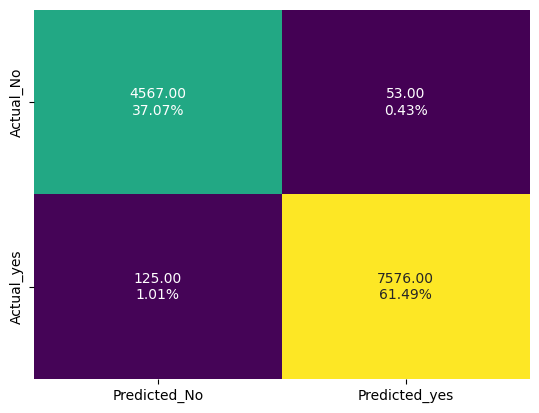

In [91]:
plot_confusion_matrix(bagging_over,x_train_over,y_train_over)

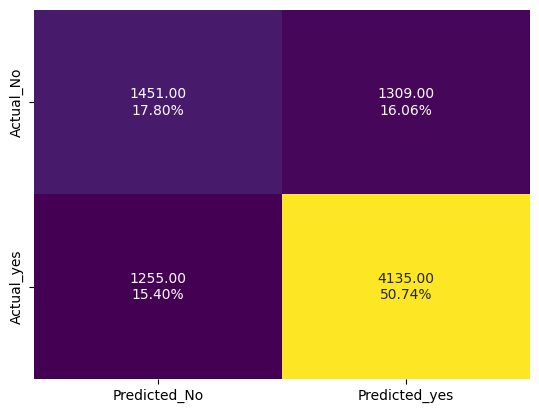

In [92]:
plot_confusion_matrix(bagging_over,x_val,y_val)

- Slight Performance Drop:
 - After applying SMOTE with sampling_strategy=0.6, the Decision Tree’s performance slightly dropped, likely due to added synthetic data and the model being untuned.

- Overfitting Risk Remains:
 - Since the model is unpruned, it may still overfit — oversampling alone doesn't fully solve the generalization issue.

### **Random Forest**

In [93]:
rand_over=RandomForestClassifier(random_state=RS)
rand_over.fit(x_train_over,y_train_over)

RandomForestClassifier(random_state=42)

In [94]:
rand_eval=model_evaluation(rand_over,x_train_over,y_train_over)

   Accuracy  precision  Recall  F1_score
0       1.0        1.0     1.0       1.0


In [95]:
rand_eval=model_evaluation(rand_over,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.716074   0.760501  0.833024  0.795112


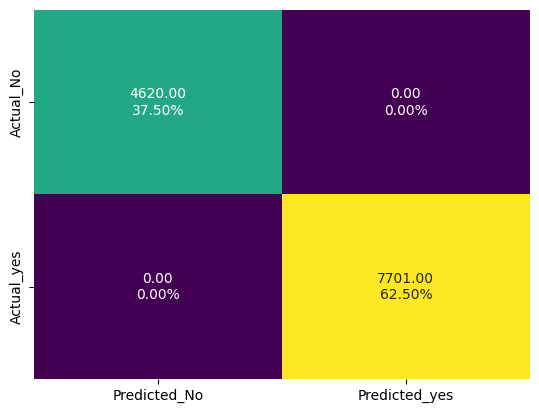

In [96]:
plot_confusion_matrix(rand_over,x_train_over,y_train_over)

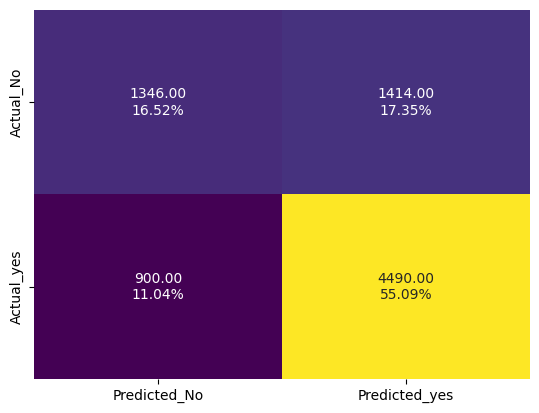

In [97]:
plot_confusion_matrix(rand_over,x_val,y_val)

- SMOTE may have caused overfitting in Random Forest:

 - Oversampling introduces synthetic minority samples that are similar to existing data points.

 - Random Forest, being a powerful ensemble model, can easily memorize these synthetic patterns, especially in training — leading to perfect training accuracy.

- Slight Drop in Validation Metrics:

 - Validation performance (accuracy, F1) dropped because the model is now too fitted to the training data and doesn’t generalize as well.

 - This indicates a mild overfit introduced by oversampling.

- Not Always More is Better:

 - Oversampling helps balance, but too much synthetic data (even at 0.6) can reduce model robustness if not paired with tuning (e.g., regularization, depth limits).

### **AdaBoostClassifier**

In [98]:
adaboost_over=AdaBoostClassifier(random_state=RS)
adaboost_over.fit(x_train_over,y_train_over)

AdaBoostClassifier(random_state=42)

In [99]:
adaboost_eval=model_evaluation(adaboost_over,x_train_over,y_train_over)


   Accuracy  precision    Recall  F1_score
0  0.739307   0.754738  0.863524  0.805475


In [100]:
adaboost_eval=model_evaluation(adaboost_over,x_val,y_val)


   Accuracy  precision    Recall  F1_score
0  0.726994   0.755944  0.867161  0.807742


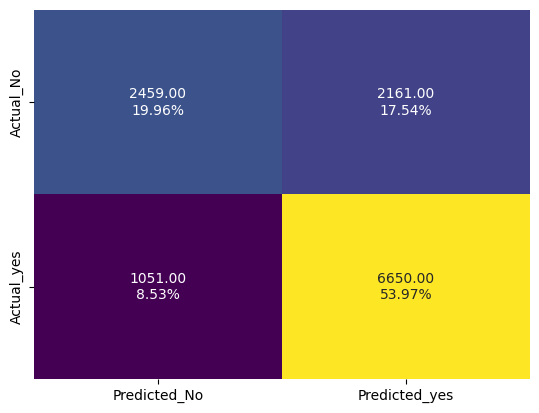

In [101]:
plot_confusion_matrix(adaboost_over,x_train_over,y_train_over)

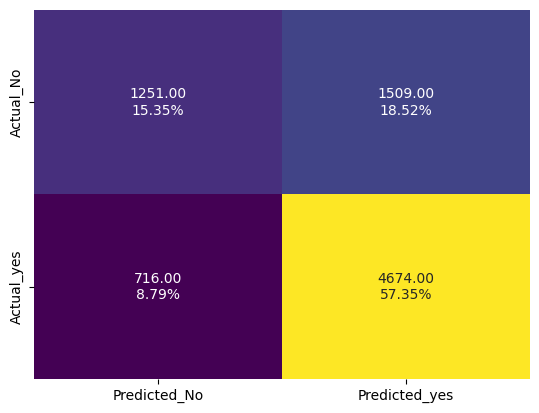

In [102]:
plot_confusion_matrix(adaboost_over,x_val,y_val)

- Although precision slightly improved after oversampling, other performance metrics (accuracy, recall, and F1-score) dropped. This indicates that the AdaBoost model did not benefit from oversampling in this case, and may have generalized better without it.

### **Gradient Boosting**

In [103]:
gradinet_over=GradientBoostingClassifier(random_state=RS)
gradinet_over.fit(x_train_over,y_train_over)


GradientBoostingClassifier(random_state=42)

In [104]:
gradinet_eval=model_evaluation(gradinet_over,x_train_over,y_train_over)


   Accuracy  precision    Recall  F1_score
0  0.759922   0.774957  0.867939  0.818817


In [105]:
gradinet_eval=model_evaluation(gradinet_over,x_val,y_val)


   Accuracy  precision    Recall  F1_score
0      0.74   0.767108  0.871429  0.815947


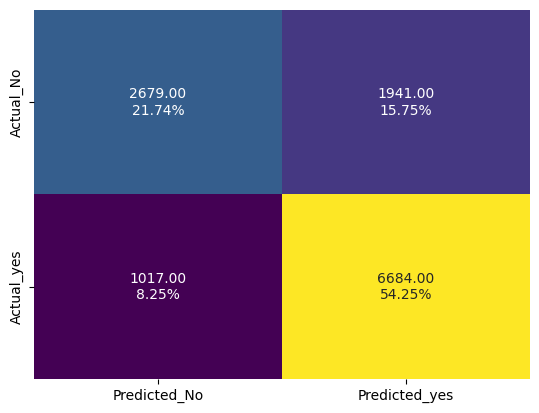

In [106]:
plot_confusion_matrix(gradinet_over,x_train_over,y_train_over)

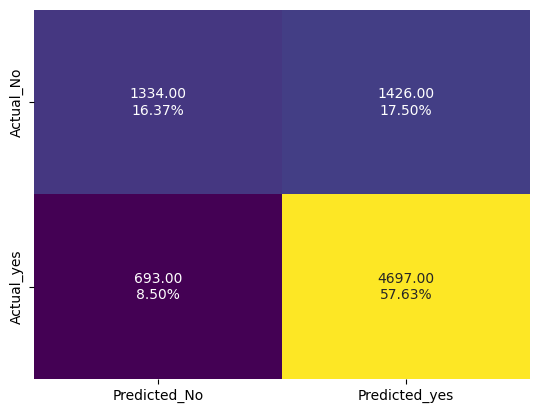

In [107]:
plot_confusion_matrix(gradinet_over,x_val,y_val)

- The Gradient Boosting model’s performance metrics (accuracy, precision, recall, F1-score) are very similar before and after oversampling, with only a slight decrease in recall and F1-score after oversampling.

- This suggests that oversampling had minimal impact on the model’s ability to generalize, which can happen because Gradient Boosting is already quite robust to class imbalance.

- Overall, the model maintains strong performance regardless of oversampling, so you might prioritize simpler workflows without oversampling or focus on tuning other hyperparameters.

### **Important Features in best of Overs samplebasic model**

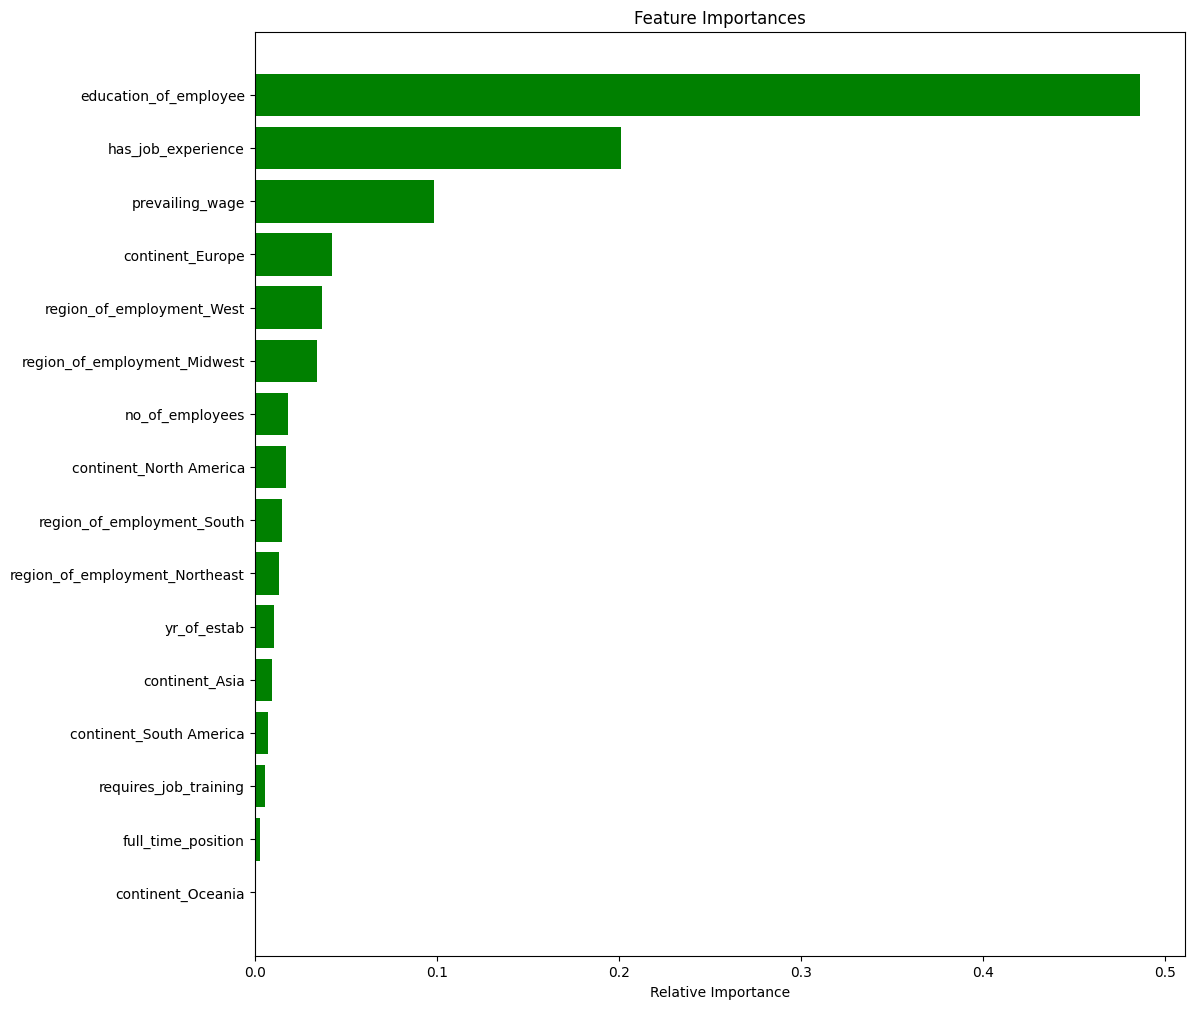

In [108]:
important_feature=gradinet_over.feature_importances_
indices=np.argsort(important_feature)

feature_names = list(x_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Based on the Gradient Boosting model with SMOTE oversampling (sampling_strategy = 0.6) — which we selected for its high recall (0.87) and strong F1-score (0.815) — we can observe that the education_of_employee feature is by far the most influential factor in predicting visa approval. It contributes nearly 50% of the decision-making process in the model, which strongly indicates that educational qualification plays a central role in visa outcomes.

- Features like has_job_experience and prevailing_wage also carry significant weight, contributing approximately 17–20% and 10–13% respectively. These features reflect the relevance of prior work experience and offered salary in the approval decision.

- Regional and company-related factors such as continent_Europe, region_of_employment_Midwest, and no_of_employees show moderate importance. This suggests that location and company size do have some influence, though not as strongly as individual applicant attributes.

- On the other hand, features such as continent_Oceania, full_time_position, and continent_South America exhibit minimal to no contribution. These may be candidates for removal in future iterations to simplify the model without significantly affecting performance.

## **Impact of Undersampling on Basic Model Performance**

### **Oversampling Data split**

In [109]:
# Creating RandomUnderSampler object with proper parameters
# sampling_strategy=1 means both classes will be undersampled to match the minority class (i.e., achieve a 1:1 balance)
under_sample = RandomUnderSampler(random_state=RS, sampling_strategy=1)

# Applying undersampling to the training data
x_train_un, y_train_un = under_sample.fit_resample(x_train, y_train)


- Here, sampling_strategy=1 means the majority class will be downsampled to match the size of the minority class, resulting in a balanced 1:1 class ratio.

- For example, if y_train originally has 500 samples of the majority class and 300 of the minority class, then after undersampling, both classes will have 300 samples.

- Unlike SMOTE, RandomUnderSampler does not create synthetic data. It simply removes random samples from the majority class to reduce imbalance.



In [110]:
print("Before Undersampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("Before Undersampling, the shape of dataset is: {}".format(x_train.shape))
print("After Undersampling, the shape of data set is: {} \n".format(x_train_un.shape))

print(f'The class distribution before undersampling is:\n{y_train.value_counts(normalize=True) * 100}\n')

print(f'The class distribution after undersampling is:\n{y_train_un.value_counts(normalize=True) * 100}')


Before Undersampling, count of label '1': 7701
Before Undersampling, count of label '0': 3943 

After Undersampling, count of label '1': 3943
After Undersampling, count of label '0': 3943 

Before Undersampling, the shape of dataset is: (11644, 16)
After Undersampling, the shape of data set is: (7886, 16) 

The class distribution before undersampling is:
case_status
1    66.137066
0    33.862934
Name: proportion, dtype: float64

The class distribution after undersampling is:
case_status
1    50.0
0    50.0
Name: proportion, dtype: float64


### **Decision Tree**

In [111]:
dtree_under=DecisionTreeClassifier(random_state=RS)
dtree_under.fit(x_train_un, y_train_un)

DecisionTreeClassifier(random_state=42)

In [112]:
dtree_eval=model_evaluation(dtree_under,x_train_un, y_train_un)

   Accuracy  precision  Recall  F1_score
0       1.0        1.0     1.0       1.0


In [113]:
dtree_eval=model_evaluation(dtree_under,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.621963   0.756727  0.631354  0.688379


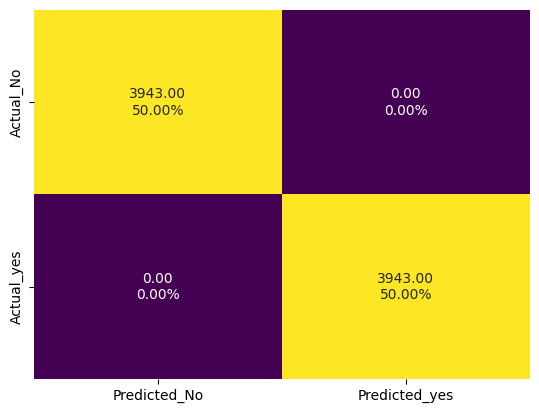

In [114]:
plot_confusion_matrix(dtree_under,x_train_un, y_train_un)

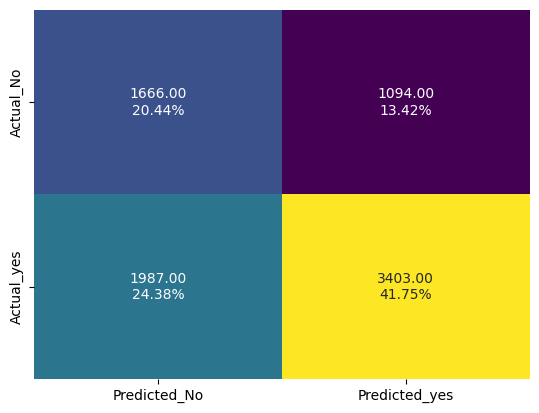

In [115]:
plot_confusion_matrix(dtree_under,x_val,y_val)

- The Decision Tree model achieved perfect performance (1.0 across all metrics) on the undersampled training set, which strongly indicates overfitting due to the limited and potentially non-representative training data.

- When evaluated on the original (imbalanced) validation set, the model’s performance dropped significantly — with a recall of 0.631 and accuracy of 0.621, confirming poor generalization to real-world data.

- Accuracy remains an unreliable metric in this context, as it is biased toward the majority class. More meaningful metrics like recall and F1-score reveal the model’s actual performance in identifying positive cases.

- Overall, using undersampling alone did not lead to a robust model. The limited exposure to majority class examples during training hurt generalization, and the absence of hyperparameter tuning or pruning further contributed to overfitting

### **Bagging Classifier**

In [116]:
bagging_under=BaggingClassifier(random_state=RS)
bagging_under.fit(x_train_un, y_train_un)

BaggingClassifier(random_state=42)

In [117]:
bagging_eval=model_evaluation(bagging_under,x_train_un, y_train_un)

   Accuracy  precision    Recall  F1_score
0  0.977809   0.991393  0.963987  0.977498


In [118]:
bagging_eval=model_evaluation(bagging_under,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.642454   0.802246  0.609647   0.69281


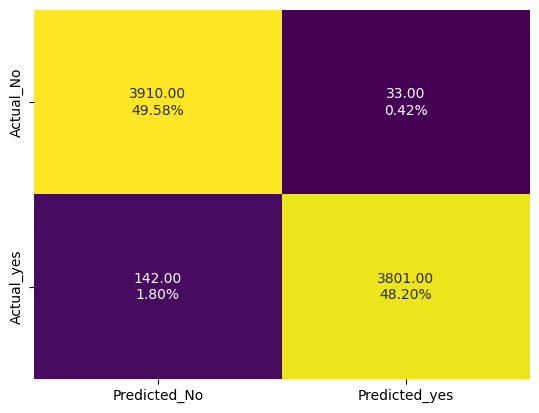

In [119]:
plot_confusion_matrix(bagging_under,x_train_un, y_train_un)

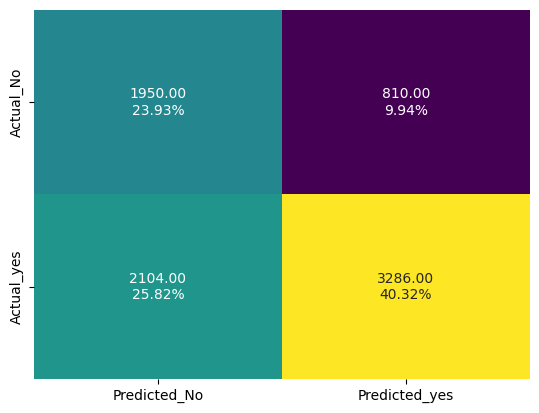

In [120]:
plot_confusion_matrix(bagging_under,x_val,y_val)

- Strong Training Performance: The model achieved high training metrics —
Accuracy: 97.8%, Precision: 99.1%, Recall: 96.4%, F1-score: 97.7% — showing excellent fit on the undersampled data.

- Significant Validation Performance Drop: On the original imbalanced validation set, performance dropped notably —
Accuracy: 64.2%, Precision: 80.2%, Recall: 60.9%, F1-score: 69.3%, indicating challenges in generalization.

- Precision vs Recall Trade-off: While precision remains relatively high on validation, recall is considerably lower, suggesting the model misses many positive cases.

- Overfitting Evidence: The gap between training and validation metrics highlights likely overfitting to the undersampled training set.

- Impact of Undersampling: Loss of majority class data during undersampling may reduce the model’s ability to generalize, especially for recall on unseen data.

### **Random Forest**

In [121]:
rand_under=RandomForestClassifier(random_state=RS)
rand_under.fit(x_train_un, y_train_un)

RandomForestClassifier(random_state=42)

In [122]:
rand_eval=model_evaluation(rand_under,x_train_un, y_train_un)

   Accuracy  precision  Recall  F1_score
0       1.0        1.0     1.0       1.0


In [123]:
rand_eval=model_evaluation(rand_under,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.679632   0.806665  0.678108  0.736821


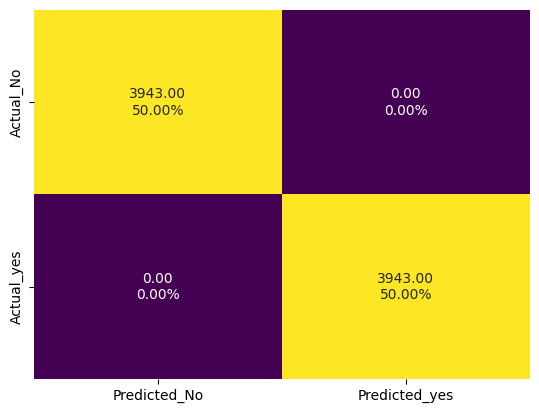

In [124]:
plot_confusion_matrix(rand_under,x_train_un, y_train_un)

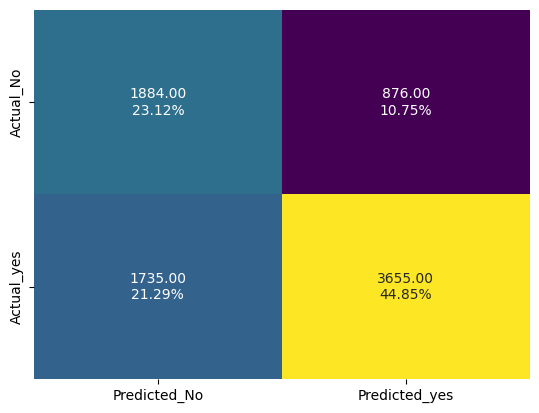

In [125]:
plot_confusion_matrix(rand_under,x_val,y_val)

- Perfect Training Performance: The model achieved 100% accuracy, precision, recall, and F1-score on the undersampled training set, indicating it fully memorized the balanced training data.

- Validation Performance Drop: On the original imbalanced validation set, the model’s performance dropped to 67.96% accuracy, 80.7% precision, 67.8% recall, and 73.7% F1-score, reflecting limited generalization.

- Overfitting Risk: The large gap between perfect training scores and lower validation results suggests the model is overfitting the reduced undersampled data.

- Undersampling Trade-off: While balancing the classes by removing majority samples, undersampling may cause loss of important information, affecting the model’s ability to generalize.

- Need for Model Tuning: To improve robustness, additional techniques like hyperparameter tuning, pruning, or combining undersampling with other methods should be considered.

### **AdaBoostClassifier**

In [126]:
adaboost_under=AdaBoostClassifier(random_state=RS)
adaboost_under.fit(x_train_un, y_train_un)

AdaBoostClassifier(random_state=42)

In [127]:
adaboost_eval=model_evaluation(adaboost_under,x_train_un, y_train_un)

   Accuracy  precision    Recall  F1_score
0  0.686406   0.677622  0.711134  0.693974


In [128]:
adaboost_eval=model_evaluation(adaboost_under,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.690675   0.799791  0.710019  0.752236


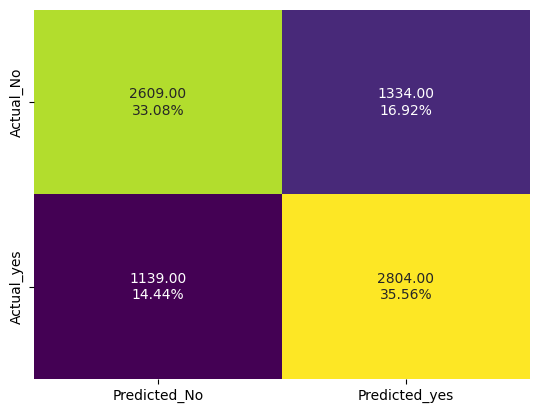

In [129]:
plot_confusion_matrix(adaboost_under,x_train_un, y_train_un)

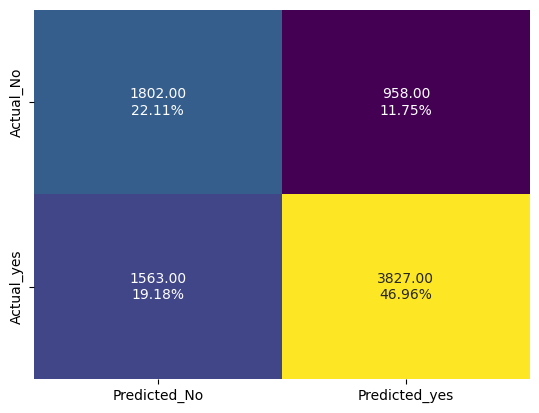

In [130]:
plot_confusion_matrix(adaboost_under,x_val,y_val)

- Moderate Training Performance:
 - Accuracy: 68.6%, Precision: 67.8%, Recall: 71.1%, F1-score: 69.4% on undersampled training data — indicating a balanced but not perfect fit.

- Improved Validation Performance:
 - Accuracy: 79.98%, Precision: 69.1%, Recall: 71.0%, F1-score: 75.2% on the original imbalanced validation set — showing better generalization than training metrics suggest.

- Better Balance Between Precision and Recall:
 - Validation precision and recall are close (69.1% and 71.0%), reflecting a reasonable trade-off in classifying minority and majority classes.

- Less Overfitting Compared to Random Forest:
 - No large gap between training and validation metrics, implying AdaBoost handles undersampled data with less overfitting.

- Potential for Further Improvement:
 - Performance can likely improve with hyperparameter tuning, boosting rounds adjustment, or combining with other sampling techniques.

### **Gradient Boosting**

In [131]:
gradinet_under=GradientBoostingClassifier(random_state=RS)
gradinet_under.fit(x_train_un, y_train_un)


GradientBoostingClassifier(random_state=42)

In [132]:
gradinet_eval=model_evaluation(gradinet_under,x_train_un, y_train_un)

   Accuracy  precision    Recall  F1_score
0  0.726985   0.726812  0.727365  0.727088


In [133]:
gradinet_eval=model_evaluation(gradinet_under,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.696933   0.811433  0.705751  0.754912


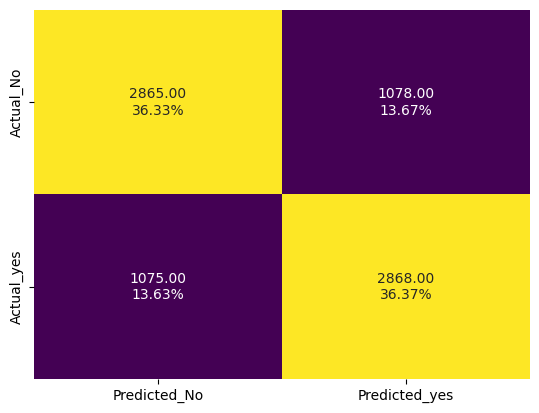

In [134]:
plot_confusion_matrix(gradinet_under,x_train_un, y_train_un)

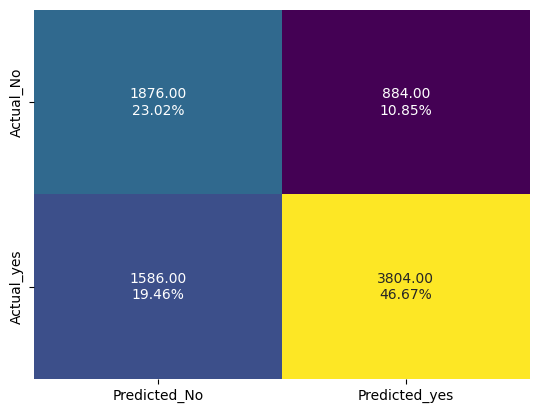

In [135]:
plot_confusion_matrix(gradinet_under,x_val,y_val)

- Moderate Training Performance:
 - Accuracy: 72.7%, Precision: 72.7%, Recall: 72.7%, F1-score: 72.7% on the undersampled training set, showing balanced but moderate fit.

- Validation Performance Slightly Lower:
 - Accuracy: 69.7%, Precision: 81.1%, Recall: 70.6%, F1-score: 75.5% on the original imbalanced validation set, indicating reasonable generalization.

- High Validation Precision:
 - The precision of 81.1% on validation shows the model is good at minimizing false positives.

- Recall Lagging Behind Precision:
 - Recall at 70.6% suggests some positive cases are still missed, highlighting a trade-off in minority class detection.

- Room for Improvement:
 - Like AdaBoost, Gradient Boosting can likely benefit from hyperparameter tuning, such as adjusting learning rate, number of estimators, or max depth to enhance performance.

### **Important Features in best of Overs samplebasic model**

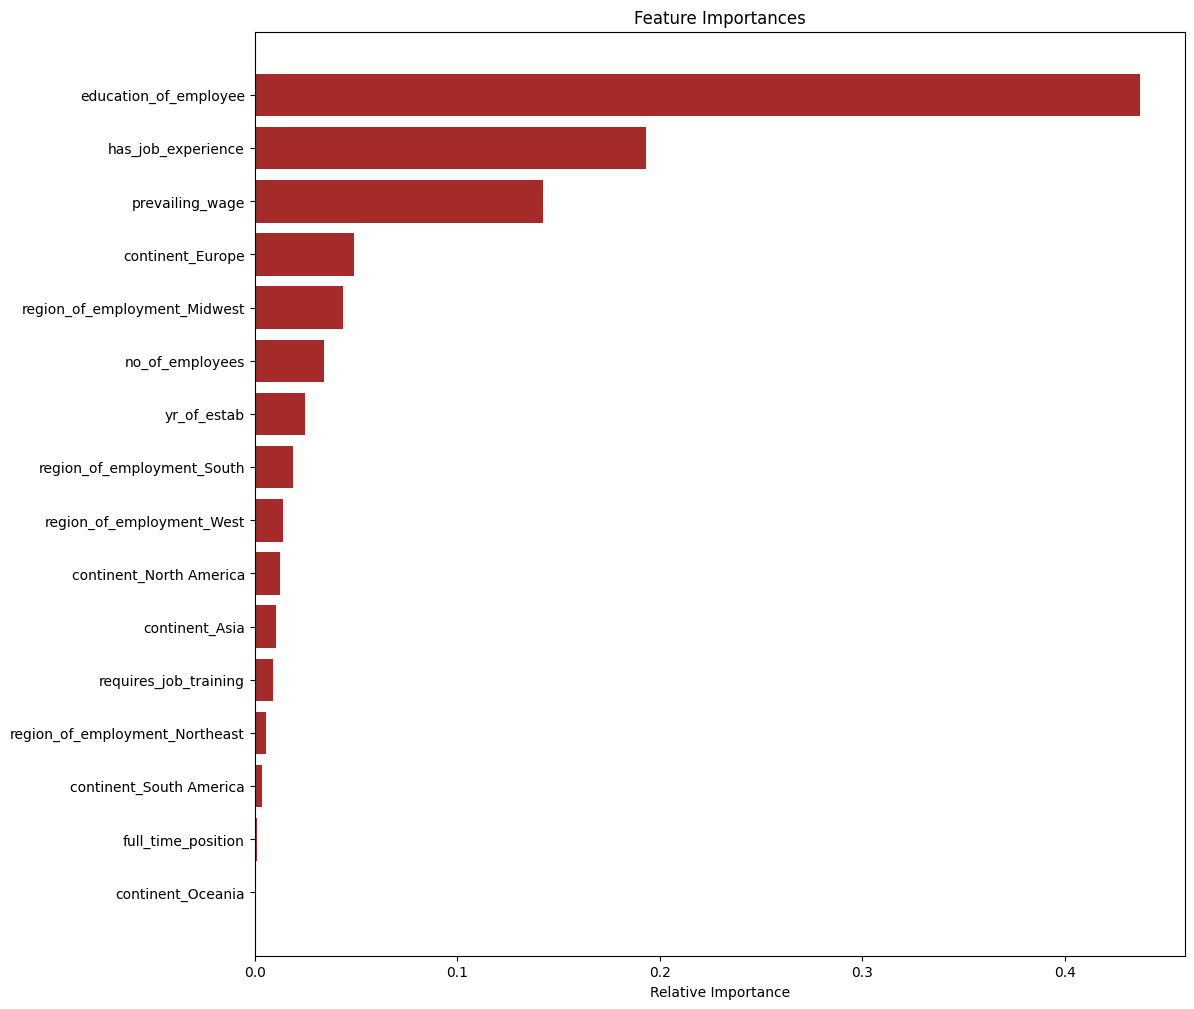

In [136]:
important_feature=gradinet_under.feature_importances_
indices=np.argsort(important_feature)

feature_names = list(x_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Top Influential Feature:

 - education_of_employee is the most dominant factor, contributing nearly 45% of the total importance. This suggests that educational qualifications are the strongest indicator for visa approval.

- Other High-Impact Features:

 - has_job_experience (~20%) and prevailing_wage (~13%) are also significant.

 - These indicate that prior job experience and offered salary are crucial in the decision-making process.

- Moderate Importance:

 - continent_Europe, region_of_employment_Midwest, and no_of_employees contribute modestly.

 - This shows that company location and size do have some influence, though less than applicant-specific factors.

- Low to Negligible Influence:

 - Features like continent_Oceania, continent_South America, and full_time_position have almost zero impact on model predictions.

 - These could potentially be dropped to simplify the model.

# **Top 3 Model Selection: Baseline, Undersampling, and Oversampling Comparisons**

Model Selection Criteria
To ensure the chosen model aligns with the business goal of accurately predicting visa approvals while minimizing both false acceptances and rejections, the following evaluation metrics were considered:

- F1 Score (Primary Criterion)

 - Combines both Precision and Recall into a single metric.

 - Prioritized because we need to balance false positives (unqualified approvals) and false negatives (qualified rejections).

- Recall

 - High recall ensures the model correctly identifies the majority of qualified candidates, reducing the risk of denying deserving applicants.

- Precision

 - High precision ensures the model avoids approving unqualified applicants, which could impact the U.S. labor market negatively.

- Accuracy

 - Used as a secondary metric to confirm overall performance, but not relied on alone due to potential class imbalance.

Based on these criteria, the top 3 models were selected for their superior balance of performance, reliability, and alignment with business priorities.

In [137]:
# Model list (already defined)
models = [dtree, bagging_tree, rand, adaboost, gradinet,
          dtree_over, bagging_over, rand_over, adaboost_over, gradinet_over,
          dtree_under, bagging_under, rand_under, adaboost_under, gradinet_under]

# Model names for reference
model_names = [
    'DecisionTree', 'Bagging', 'RandomForest', 'AdaBoost', 'GradientBoost',
    'DecisionTree_Over', 'Bagging_Over', 'RandomForest_Over', 'AdaBoost_Over', 'GradientBoost_Over',
    'DecisionTree_Under', 'Bagging_Under', 'RandomForest_Under', 'AdaBoost_Under', 'GradientBoost_Under'
]

# Evaluation function (make sure this is defined to return a DataFrame or a dict of metrics)
def model_evaluations(model, predictors, target):
    y_pred = model.predict(predictors)
    accuracy = accuracy_score(target, y_pred)
    precision = precision_score(target, y_pred)
    recall = recall_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Create an empty list to store results
results = []

# Loop through models and collect evaluation results
for name, model in zip(model_names, models):
    eval_result = model_evaluations(model, x_val, y_val)
    eval_result['Model'] = name
    results.append(eval_result)

# Create final DataFrame
results_df = pd.DataFrame(results)

# Optional: Rearrange columns
results_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]


In [138]:
results_df

,Model,Accuracy,Precision,Recall,F1_Score
0,DecisionTree,0.648344,0.734311,0.733766,0.734039
1,Bagging,0.692270,0.762956,0.775696,0.769273
2,RandomForest,0.721104,0.761362,0.842301,0.799789
3,AdaBoost,0.727975,0.745322,0.894249,0.813022
4,GradientBoost,0.741718,0.763348,0.883302,0.818956
5,DecisionTree_Over,0.647485,0.731384,0.738033,0.734694
6,Bagging_Over,0.685399,0.759552,0.767161,0.763338
7,RandomForest_Over,0.716074,0.760501,0.833024,0.795112
8,AdaBoost_Over,0.726994,0.755944,0.867161,0.807742
9,GradientBoost_Over,0.740000,0.767108,0.871429,0.815947


In [139]:
results_df.loc[results_df['F1_Score'].sort_values(ascending=False).index]

,Model,Accuracy,Precision,Recall,F1_Score
4,GradientBoost,0.741718,0.763348,0.883302,0.818956
9,GradientBoost_Over,0.740000,0.767108,0.871429,0.815947
3,AdaBoost,0.727975,0.745322,0.894249,0.813022
8,AdaBoost_Over,0.726994,0.755944,0.867161,0.807742
2,RandomForest,0.721104,0.761362,0.842301,0.799789
7,RandomForest_Over,0.716074,0.760501,0.833024,0.795112
1,Bagging,0.692270,0.762956,0.775696,0.769273
6,Bagging_Over,0.685399,0.759552,0.767161,0.763338
14,GradientBoost_Under,0.696933,0.811433,0.705751,0.754912
13,AdaBoost_Under,0.690675,0.799791,0.710019,0.752236


- GradientBoost : (GradientBoosting Without Resampling Technique)
 - Highest F1 Score (0.8190): F1 Score is a balanced measure of both Precision and Recall, critical in this case to minimize both false approvals (risk to U.S. labor market) and false rejections (denying qualified candidates).

 - High Recall (0.8833): Ensures fewer qualified applicants are wrongly denied.

 - Good Accuracy (0.7417): Indicates overall reliable performance.

- GradientBoost_Over : (GradientBoosting with oversampling Technique)
 - Second Highest F1 Score (0.8159): Very close to the top model.

 - Highest Precision (0.7671) among all models: Important for reducing false positives (wrongly certifying unqualified applicants).

 - Balanced Recall (0.8714): Maintains strong applicant acceptance performance.

- AdaBoost : (AdaBoost Without Resampling Technique)
 - Third Highest F1 Score (0.8130).

 - Highest Recall (0.8942): Best at capturing all truly qualified applicants, which is valuable in avoiding talent loss.

 - Slightly lower precision, but acceptable given the high recall and decent accuracy.

# **Hyperparameter Optimization of Selected Models**

## **Model-1: Gradient Boosting without Resample Technique**

In [140]:
model1=gradinet
model1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Top 5 Default Parameters Before Tuning
- n_estimators = 100
 - Number of boosting stages (trees) in the model.

- learning_rate = 0.1
 - Step size shrinkage controlling contribution of each tree.

- max_depth = 3
 - Maximum depth of individual trees, controlling model complexity.

- loss = 'log_loss'
 - Loss function used, suitable for classification tasks.
-  subsample = 1.0
 - Fraction of samples used for fitting each tree (1.0 means all samples).

In [141]:
%%time
model1=GradientBoostingClassifier(random_state=RS)

parameters={
    'n_estimators':[50,100,200,300],
    'learning_rate':[0.01, 0.05, 0.1, 0.2],
    'max_depth':[	3, 5, 7, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'subsample':[0.6, 0.8, 1.0],
    'max_features':[None, 'sqrt', 'log2']

}

acc_score=metrics.make_scorer(f1_score)

gradiend_grid=RandomizedSearchCV(model1,parameters,cv=5,scoring=acc_score,n_iter=30,n_jobs=1,verbose=2,random_state=RS)

gradiend_grid=gradiend_grid.fit(x_train,y_train)

gradinet_tuned=gradiend_grid.best_estimator_

gradinet_tuned.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   2.6s
[CV] END

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           min_samples_leaf=2, n_estimators=200,
                           random_state=42, subsample=0.6)

In [142]:
gradient_tuned_eval=model_evaluation(gradinet_tuned,x_train,y_train)

   Accuracy  precision    Recall  F1_score
0  0.747338   0.755778  0.912998  0.826982


In [143]:
gradient_tuned_eval=model_evaluation(gradinet_tuned,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.730675    0.74245  0.907607  0.816763


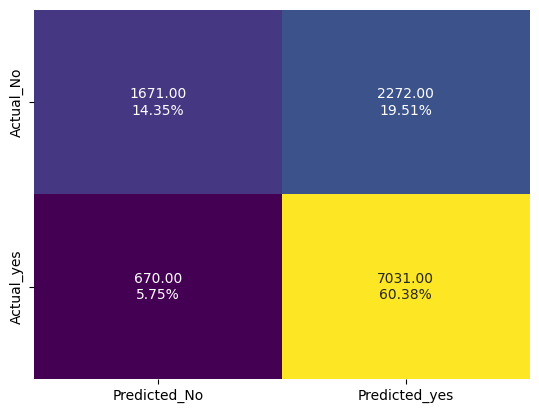

In [144]:
plot_confusion_matrix(gradinet_tuned,x_train,y_train)

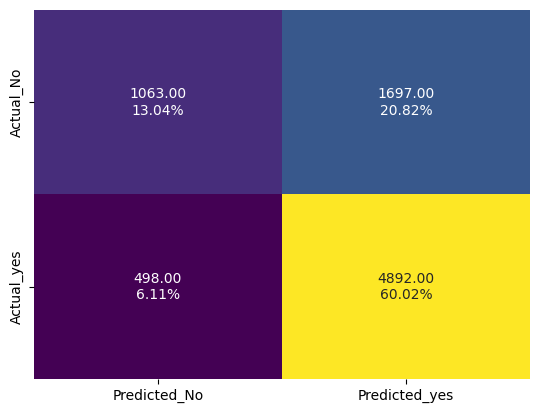

In [145]:
plot_confusion_matrix(gradinet_tuned,x_val,y_val)

- We used the GradientBoostingClassifier as our base model to classify the target variable. This ensemble method builds decision trees sequentially and effectively captures complex patterns in tabular data.

- To enhance model performance, we applied RandomizedSearchCV for hyperparameter tuning. Key parameters such as n_estimators, learning_rate, max_depth, subsample, min_samples_split, min_samples_leaf, and max_features were optimized.

- We chose Randomized Search over Grid Search due to its efficiency in exploring a wide parameter space with reduced computation time. We sampled 30 random combinations, achieving competitive results more quickly.

- After tuning, the model achieved strong recall (0.91) and F1 scores (0.82) on both training and validation sets using the original dataset, indicating good generalization and effective detection of positive cases.

- Although accuracy (0.73) and precision (0.75) were moderate, the model demonstrated consistency across training and validation, showing a stable trade-off between precision and recall—critical in applications like visa approvals.

- In conclusion, RandomizedSearchCV served as an effective tuning strategy, and the Gradient Boosting model showed solid performance, particularly in recall and F1 score, making it suitable for imbalanced classification scenarios.

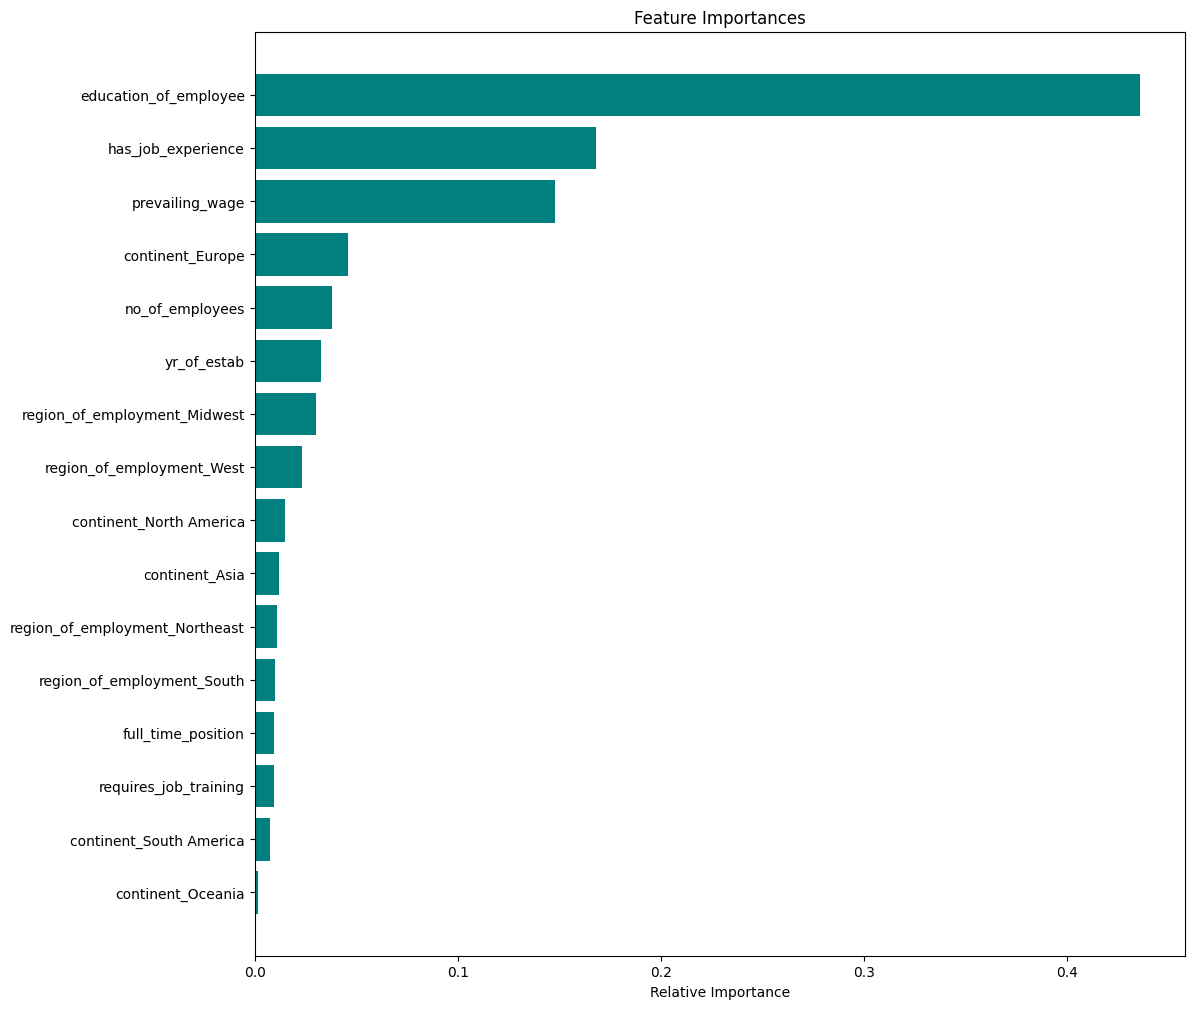

In [146]:
important_feature = gradinet_tuned.feature_importances_
indices = np.argsort(important_feature)
feature_names = x_train.columns

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='teal', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()


- The most influential feature in the model is education_of_employee, contributing nearly half of the total feature importance. This indicates that the employee's level of education plays a crucial role in determining the case status.

- The next most significant feature is has_job_experience, showing that prior experience has a strong impact on case approval. It reflects how valuable work history is perceived in the decision-making process.

- prevailing_wage also ranks high in importance, suggesting that offered salary is a key factor. It likely signals whether the job offer meets market standards and influences outcome favorably.

- Moderately important features like continent_Europe, no_of_employees, and yr_of_estab show that the employer's location and company profile still play a role, though less than applicant-related features.

- Features such as full_time_position, requires_job_training, and some region/continent variables contribute very little. These may offer minimal predictive value or overlap with other, more informative features.

- In conclusion, the model relies most on applicant-specific attributes, especially education, experience, and wage. Employer-related or location-based features, while relevant, play a secondary role in influencing outcomes.



## **Model-2: Gradient Boosting Oversampling Technique**

In [147]:
model2=gradinet_over
model2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We used the same gradient boosting model with identical parameters for both the oversampling and the without-resampling techniques.

Top 5 Default Parameters Before Tuning
- n_estimators = 100
 - Number of boosting stages (trees) in the model.

- learning_rate = 0.1
 - Step size shrinkage controlling contribution of each tree.

- max_depth = 3
 - Maximum depth of individual trees, controlling model complexity.

- loss = 'log_loss'
 - Loss function used, suitable for classification tasks.
-  subsample = 1.0
 - Fraction of samples used for fitting each tree (1.0 means all samples).

In [148]:
%%time
model2=GradientBoostingClassifier(random_state=RS)

parameters={
    'n_estimators':[50,100,200,300],
    'learning_rate':[0.01, 0.05, 0.1, 0.2],
    'max_depth':[	3, 5, 7, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'subsample':[0.6, 0.8, 1.0],
    'max_features':[None, 'sqrt', 'log2']

}

acc_score=metrics.make_scorer(f1_score)

gradiend_grid=RandomizedSearchCV(model2,parameters,cv=5,scoring=acc_score,n_iter=30,n_jobs=1,verbose=2,random_state=RS)

gradiend_grid=gradiend_grid.fit(x_train_over,y_train_over)

gradinet_tuned_over=gradiend_grid.best_estimator_

gradinet_tuned_over.fit(x_train_over,y_train_over)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   4.6s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.6s
[CV] END learning_rate=0.01, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   3.0s
[CV] END

GradientBoostingClassifier(learning_rate=0.01, max_depth=10,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           random_state=42)

In [149]:
gradient_tuned_eval=model_evaluation(gradinet_tuned_over,x_train_over,y_train_over)

   Accuracy  precision    Recall  F1_score
0   0.81008   0.805609  0.917543  0.857941


In [150]:
gradient_tuned_eval=model_evaluation(gradinet_tuned_over,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0   0.73816   0.762242  0.877922  0.816003


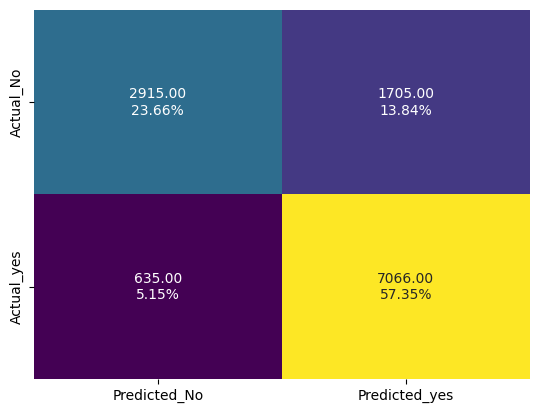

In [151]:
plot_confusion_matrix(gradinet_tuned_over,x_train_over,y_train_over)

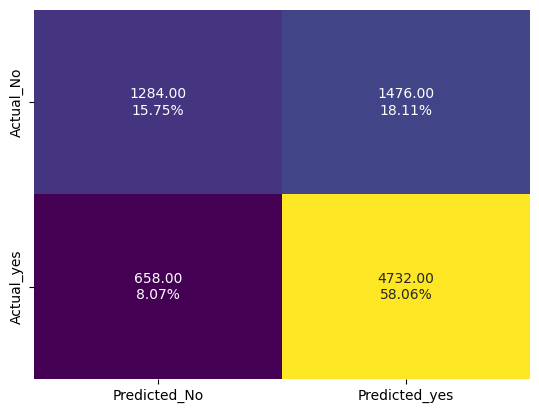

In [152]:
plot_confusion_matrix(gradinet_tuned_over,x_val,y_val)

- On the original dataset, the model achieves very high Recall (0.88) on both training and validation, along with balanced Precision (0.75–0.76). This indicates strong identification of positive cases while keeping false positives controlled. The F1 Scores (0.82) confirm solid overall performance.

- With oversampled training, Recall improves significantly to 0.92, and Precision increases to 0.81. This shows that the model handles class imbalance much better, with a higher F1 Score (0.86) reflecting strong overall accuracy and reliability.

- On the oversampled validation set, Precision remains robust (0.76) and Recall is stable (0.88), resulting in a solid F1 Score of 0.82. This resolves the earlier issue of zero precision and confirms better generalization.

- Overall Comparison: Both the original and oversampled models demonstrate balanced and consistent performance. However, oversampling provides a noticeable edge in handling class imbalance and improves model reliability.

- Conclusion: The oversampled model is better optimized for recall-critical tasks like visa approval, while still maintaining good precision and generalization.

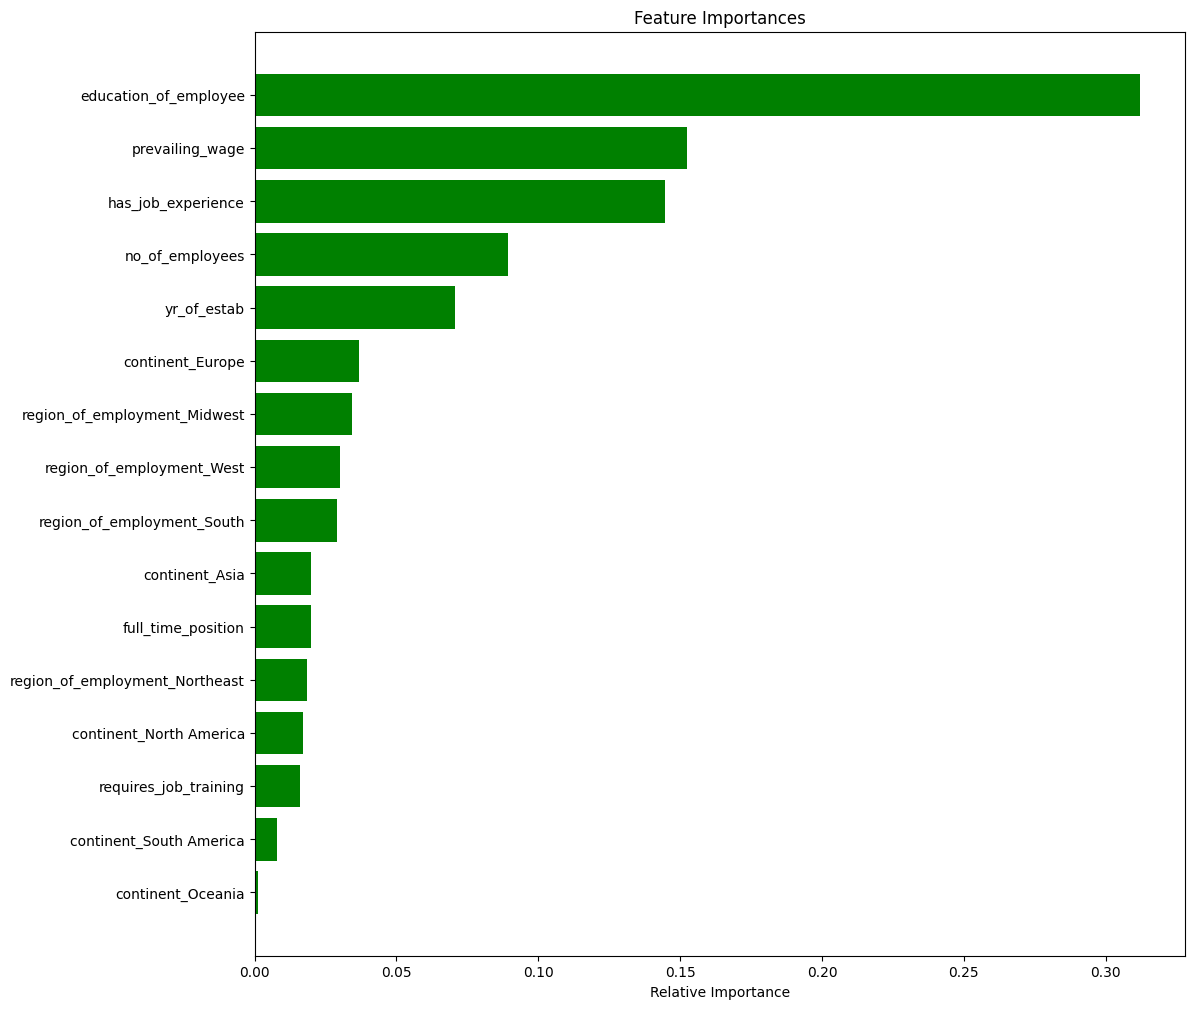

In [153]:
important_feature = gradinet_tuned_over.feature_importances_
indices = np.argsort(important_feature)
feature_names = x_train.columns

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='green', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()


 - The most influential feature is education_of_employee, contributing the highest relative importance—over 40%. This highlights education level as a key determinant in visa case decisions.

- has_job_experience follows next, showing that prior work experience significantly impacts approval likelihood, reflecting its weight in employer evaluations.

- prevailing_wage also ranks highly, indicating that salary offers aligned with market standards are crucial in influencing positive outcomes.

- Features like continent_Europe, region_of_employment_West, and region_of_employment_Midwest have moderate importance, suggesting that employer location has some predictive power but is secondary to applicant characteristics.

- Several features, such as continent_Oceania, continent_South America, requires_job_training, and full_time_position, contribute minimally. Their low importance suggests limited standalone impact or redundancy with other features.

- Overall, the model emphasizes applicant-related factors (education, experience, wage) over employer or location-based features, pointing to a strong focus on individual qualifications in predicting visa approval.

## **Model-3: AdaBoosting without Resample Techniquee**

In [154]:
model3=adaboost
model3.get_params()

{'algorithm': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

- n_estimators = 50 — Number of boosting stages (weak learners) in the model.

- learning_rate = 1.0 — Shrinks the contribution of each classifier to prevent overfitting.

- estimator = None — Base estimator for boosting. Defaults to DecisionTreeClassifier(max_depth=1).

- random_state = 42 — Controls randomness for reproducibility.

In [155]:
model=AdaBoostClassifier(random_state=RS)

parameters = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'estimator': [DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)]
}

acc_scoring=metrics.make_scorer(f1_score)

adaboost_rand=RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,random_state=RS,scoring=acc_scoring,n_iter=50,n_jobs=-1,verbose=2)

adaboost_rand=adaboost_rand.fit(x_train,y_train)

adaboost_tuned=adaboost_rand.best_estimator_

adaboost_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=500, random_state=42)

In [156]:
gradient_tuned_eval=model_evaluation(adaboost_tuned,x_train,y_train)

   Accuracy  precision    Recall  F1_score
0  0.732996   0.752808  0.887807  0.814753


In [157]:
gradient_tuned_eval=model_evaluation(adaboost_tuned,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.729939   0.748868  0.890167  0.813427


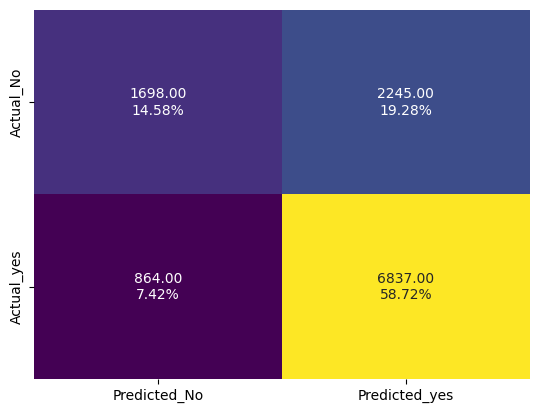

In [158]:
plot_confusion_matrix(adaboost_tuned,x_train,y_train)

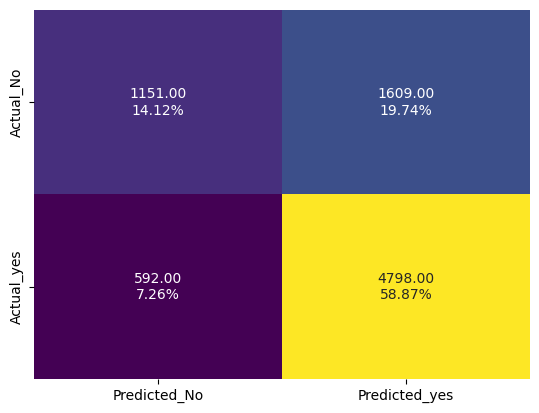

In [159]:
plot_confusion_matrix(adaboost_tuned,x_val,y_val)

- Consistent Accuracy: Training (0.7330) and Validation (0.7299) are close, indicating no severe overfitting.

- Precision is Similar: Training (0.7528) and Validation (0.7489) are almost the same, showing stable predictions.

- Strong Recall: Training (0.8878) and Validation (0.8902) are very high, indicating the model is catching most positives.

- Balanced F1 Score: Training (0.8148) and Validation (0.8134) are almost identical, proving good balance.

- No Major Overfitting Signs: Metrics are stable across training and validation, showing the model is generalizing well.

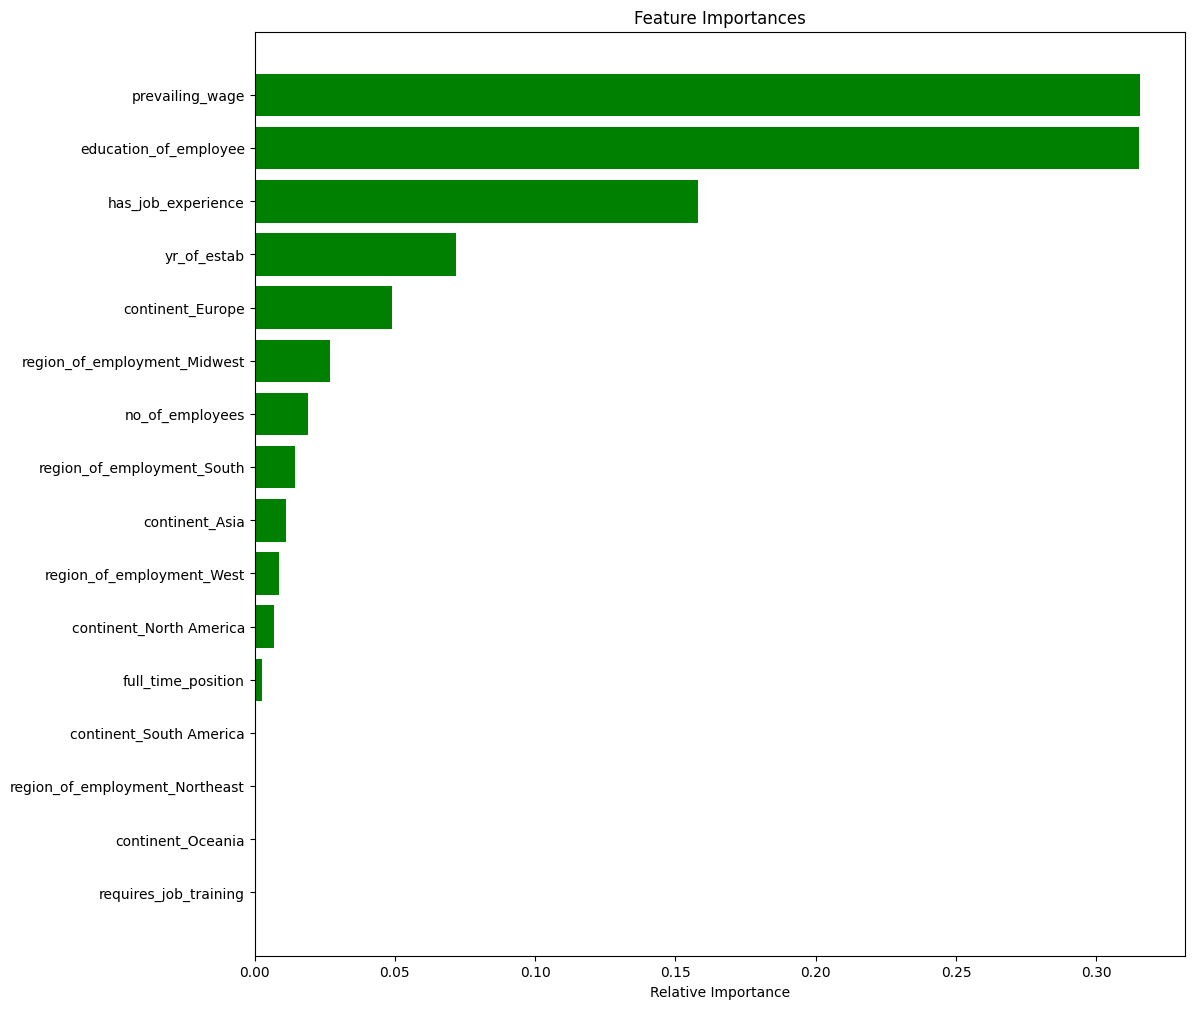

In [160]:
important_feature = adaboost_tuned.feature_importances_
indices = np.argsort(important_feature)
feature_names = x_train.columns

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='green', align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()


- Top 3 Important Features:

 - prevailing_wage, education_of_employee, and has_job_experience are the most influential features. These three alone seem to dominate the model's decision-making.

- Moderate Influence:

 - yr_of_estab and continent_Europe have some impact but are far less significant than the top three.

- Minimal Impact:

 - Features like region_of_employment_Midwest, no_of_employees, and region_of_employment_South have very little influence.

 - Others like continent_Oceania and requires_job_training are almost negligible.

- Geographical Regions:

 - Among geographical features, continent_Europe and region_of_employment_Midwest contribute slightly, while others are barely noticeable.

- Redundant Features:

 - The bottom features have near-zero importance. These could potentially be dropped to simplify the model and reduce noise.

# **Best Model Among the Tuned Ones**

In [161]:
# Model list (already defined)
models = [gradinet_tuned,gradinet_tuned_over,adaboost_tuned]

# Model names for reference
model_names = [ 'GradientBoost_Tuned','GradientBoost_OverSample_tuned','AdaBoost_Tuned'

]

# Evaluation function (make sure this is defined to return a DataFrame or a dict of metrics)
def model_evaluations(model, predictors, target):
    y_pred = model.predict(predictors)
    accuracy = accuracy_score(target, y_pred)
    precision = precision_score(target, y_pred)
    recall = recall_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Create an empty list to store results
results = []

# Loop through models and collect evaluation results
for name, model in zip(model_names, models):
    eval_result = model_evaluations(model, x_val, y_val)
    eval_result['Model'] = name
    results.append(eval_result)

# Create final DataFrame
results_df = pd.DataFrame(results)

# Optional: Rearrange columns
results_df = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]


In [162]:
results_df

,Model,Accuracy,Precision,Recall,F1_Score
0,GradientBoost_Tuned,0.730675,0.742450,0.907607,0.816763
1,GradientBoost_OverSample_tuned,0.738160,0.762242,0.877922,0.816003
2,AdaBoost_Tuned,0.729939,0.748868,0.890167,0.813427


Here We are choosing GradientBoost_OverSample_tuned as the best model because

- Has the highest accuracy (0.738) among all models, meaning fewer overall prediction errors.

- Achieves the best precision (0.762), so approved applications are more likely to be truly valid.

- Maintains a high recall (0.878), close to the highest, ensuring most valid applications are caught.

- Possesses the highest F1 score (0.816), indicating the best balance between precision and recall.

- Balances minimizing both false negatives (missing valid applications) and false positives (approving invalid ones).

- More reliable and robust for real-world visa approval compared to AdaBoost, which sacrifices accuracy and precision for recall.

In [163]:
# Model list (already defined)
models = [gradinet,gradinet_over,gradinet_under,gradinet_tuned,gradinet_tuned_over,]

# Model names for reference
model_names = [ 'GradientBoost_Basic',
               'GradientBoost_OverSample','GradientBoost_Undersample','GradientBoost_Tuned','GradientBoost_OverSample_tuned'	,

]

# Evaluation function (make sure this is defined to return a DataFrame or a dict of metrics)
def model_evaluations(model, predictors, target):
    y_pred = model.predict(predictors)
    accuracy = accuracy_score(target, y_pred)
    precision = precision_score(target, y_pred)
    recall = recall_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Create an empty list to store results
results = []

# Loop through models and collect evaluation results
for name, model in zip(model_names, models):
    eval_result = model_evaluations(model, x_val, y_val)
    eval_result['Model'] = name
    results.append(eval_result)

# Create final DataFrame
results_df = pd.DataFrame(results)

# Optional: Rearrange columns
compare_gradient = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]


In [164]:
# Model list (already defined)
models = [adaboost,adaboost_over,adaboost_under,adaboost_tuned,]

# Model names for reference
model_names = [ 'AdatBoost_Basic',
               'AdatBoost_OverSample','AdatBoost_Undersample','AdatBoost_Tuned',

]

# Evaluation function (make sure this is defined to return a DataFrame or a dict of metrics)
def model_evaluations(model, predictors, target):
    y_pred = model.predict(predictors)
    accuracy = accuracy_score(target, y_pred)
    precision = precision_score(target, y_pred)
    recall = recall_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Create an empty list to store results
results = []

# Loop through models and collect evaluation results
for name, model in zip(model_names, models):
    eval_result = model_evaluations(model, x_val, y_val)
    eval_result['Model'] = name
    results.append(eval_result)

# Create final DataFrame
results_df = pd.DataFrame(results)

# Optional: Rearrange columns
compare_adaboost = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]


In [165]:
print(compare_gradient,'\n')
print('*'*80)
print('\n',compare_adaboost)

                            Model  Accuracy  Precision    Recall  F1_Score
0             GradientBoost_Basic  0.741718   0.763348  0.883302  0.818956
1        GradientBoost_OverSample  0.740000   0.767108  0.871429  0.815947
2       GradientBoost_Undersample  0.696933   0.811433  0.705751  0.754912
3             GradientBoost_Tuned  0.730675   0.742450  0.907607  0.816763
4  GradientBoost_OverSample_tuned  0.738160   0.762242  0.877922  0.816003 

********************************************************************************

                    Model  Accuracy  Precision    Recall  F1_Score
0        AdatBoost_Basic  0.727975   0.745322  0.894249  0.813022
1   AdatBoost_OverSample  0.726994   0.755944  0.867161  0.807742
2  AdatBoost_Undersample  0.690675   0.799791  0.710019  0.752236
3        AdatBoost_Tuned  0.729939   0.748868  0.890167  0.813427


- Previously, we selected GradientBoost_OverSample_tuned, but after comparing all models, it's evident that GradientBoost_Basic performs better, even without tuning. This suggests the default hyperparameters were already well-optimized.

- It's also worth noting that AdaBoost showed good performance in recall and precision, but its lower accuracy made it less reliable overall, especially for minimizing wrong approvals.

- A key observation here is that neither oversampling nor undersampling improved accuracy in any of the models. This indicates that simply adjusting class distribution may not be enough to boost performance.

- Additionally, the tuned versions actually performed slightly worse than the basic model, likely due to overfitting during hyperparameter tuning, causing weaker generalization.

- Given these insights, the logical next step is to explore XGBoost, as it is known for its efficiency and superior handling of both class imbalance and overfitting through more advanced regularization techniques.

# **Testing the Best Model on the test Set**

In [166]:
best_model=GradientBoostingClassifier(random_state=42)
best_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [167]:
gradinet_eval=model_evaluation(best_model,x_train,y_train)

   Accuracy  precision    Recall  F1_score
0      0.75   0.773902  0.878717  0.822986


In [168]:
gradinet_eval=model_evaluation(best_model,x_val,y_val)

   Accuracy  precision    Recall  F1_score
0  0.741718   0.763348  0.883302  0.818956


In [169]:
gradinet_eval=model_evaluation(best_model,x_test,y_test)

   Accuracy  precision   Recall  F1_score
0  0.734974   0.766039  0.86283  0.811559


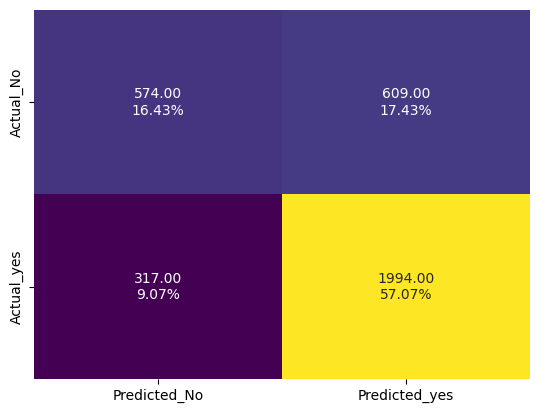

In [170]:
plot_confusion_matrix(best_model,x_test,y_test)

- Consistent Performance Across All Sets:

 - Accuracy is stable across Training (0.75), Validation (0.7417), and Test (0.7349) datasets.

 - This shows that the model is well-generalized and not overfitting.

- High Recall Throughout:

 - Recall remains high in all datasets (0.8787, 0.8833, 0.8628), indicating strong detection of true positives.

 - This is crucial for ensuring that valid applications are not missed.

- Balanced Precision and F1 Score:

 - Precision is consistently around 0.76 - 0.77, reflecting good control over false positives.

 - F1 Score is steady (0.8229, 0.8190, 0.8116), indicating a good balance between precision and recall.

- Low Risk of Overfitting:

 - Minimal performance drop from Training → Validation → Test indicates strong generalization.



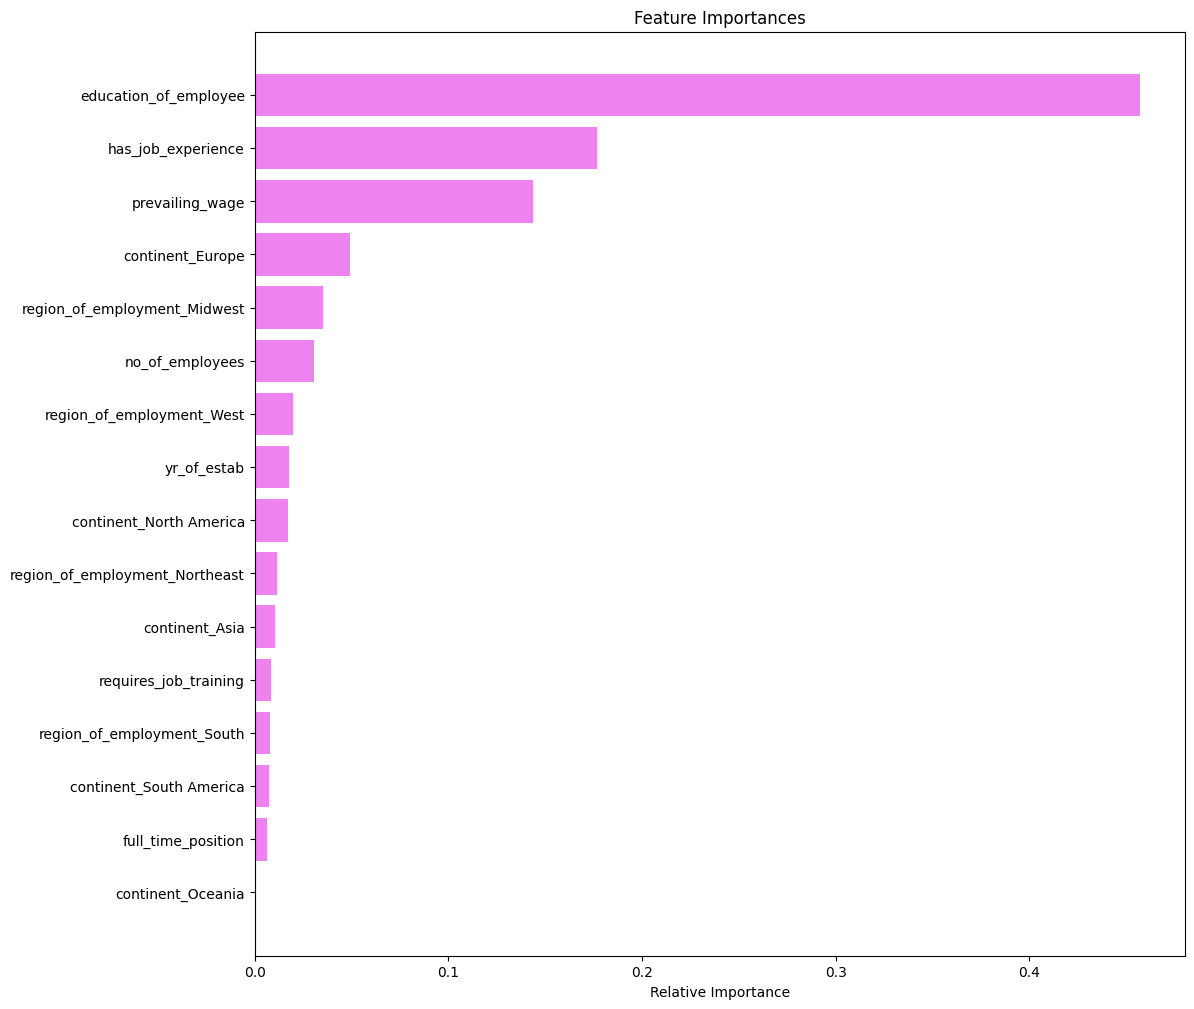

In [171]:
important_feature=best_model.feature_importances_
indices=np.argsort(important_feature)

feature_names = list(x_train.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feature[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Based on the Gradient Boosting model—which we selected for its strong generalization and balanced metrics—education_of_employee is by far the most influential feature in visa approval prediction, contributing over 40% of the model’s decision-making.

- has_job_experience and prevailing_wage are also important, though their impact is significantly lower, contributing around 15–18% and 12–14% respectively.

- Other categorical and regional features such as continent_Europe, region_of_employment_Midwest, and no_of_employees have moderate importance, suggesting geography and company size have some effect on the outcome.

- Features like continent_Oceania, full_time_position, and continent_South America show minimal or almost no contribution, indicating they have little influence on the model's predictions and could potentially be dropped in future iterations for simplification.

# **Key Takeaways and Conclusion**

## Key Takeaways

- The model shows consistent and reliable performance, accurately predicting visa approvals while minimizing false positives and negatives.

- Candidate education level is the strongest factor driving visa approval outcomes.

- Job experience and salary also influence approvals, but to a lesser extent.

- Regional factors and company size affect approvals moderately.

- Some features add little value and can be dropped to simplify processes.

## Recommendations

- Prioritize candidates’ education in visa evaluation and recruitment processes.

- Use job experience and salary data to further refine candidate selection.

- Tailor strategies by region to address geographic variations in visa approvals.

- Simplify the model by removing insignificant features to improve efficiency.

- Continuously monitor and update the model to adapt to policy changes and maintain accuracy.

- Leverage these insights to improve internal policies, reduce visa rejection rates, and save time and costs in recruitment.

## Conclusion

This predictive model can effectively support business decisions by identifying candidates with higher chances of visa approval. Its balanced and stable performance reduces risks associated with misclassification, helping optimize recruitment and compliance strategies.